<a href="https://colab.research.google.com/github/AnishaA-git/SanDiego-Housing/blob/master/DM_Project_SanDiego_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Maximize Cash Flow Through Rental Properties in San Diego**

## **Business Case and Value**

Business case is to find properties that are good investments.

An investor couldn't be more happier if he/she gets the combination of below 5 data, which could be profitable, affordable and safe. The objective of this project is to find such combination. Below are the given data which are directly related to the objective. We are trying to find such data, amalgamate them, do some analysis, prediction ad provide the accuracy to the data which we have formed.

**Good investment = Rent Zestimate - Monthly Mortgage(HOA, Property Taxes, upKeep) > 0**

**Approach:** 

From dataset 1,2,3 we are trying to get the best features which can actually have a large impact on buying/investing in houses. Like, 
1. For calculating **Mortgage value** we need **30 year fixed rate**, which we have taken from 2nd dataset.
2. For **Property Tax price** calculation, we need **property tax rate**, which we have taken from 2nd dataset.
3. For an **accurate calculation of Good investment** we also need **HOA**, which we have taken from 2nd dataset.
4. Adding **Crime rate data**, definitely enhanced the dataset, added from 3rd dataset.
5. Added **Average Income** from 3rd dataset

**Latent Variable** = having the best combination above 5 data, which could be profitable, affordable and safe.

## **Importing Libraries**

In [ ]:
!pip install shap

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from past.builtins import xrange
from itertools import cycle, islice
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from pandas.plotting import parallel_coordinates

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
from google.colab import drive, files # specific to Google Colab
import requests
import json
import time

# show all columns
pd.set_option('display.max_columns', None)

# **Loading First DataSet**

The first Dataset is scraped from **Zillow**.

**What is Zillow ?**

**Zillow** is the leading real estate and rental marketplace dedicated to empowering consumers with data, inspiration and knowledge around the place.



In [ ]:
filename = "https://raw.githubusercontent.com/AnishaA-git/SanDiego-Housing/master/Dataset_Realestate.csv"
df = pd.read_csv(filename, sep=',')
df

,rank,property_id,address,latitude,longitude,price,currency,bathrooms,bedrooms,area,land_area,zestimate,rent_zestimate,days_on_zillow,sold_date,is_zillow_owned,image,listing_type,broker_name,input,property_url,listing_url
0,205,70983496,"109 Sunrise Fls, Cibolo, TX 78108",29.599431,-98.254866,296000.0,USD,3.0,3.0,2294.0 sqft,NaN,270100.0,2024.0,0.0,NaN,False,https://photos.zillowstatic.com/fp/41ca4905859...,House for sale,Opendoor Brokerage LLC,https://www.zillow.com/homes/TX_rb/,https://www.zillow.com/homedetails/109-Sunrise...,https://www.zillow.com/homes/TX_rb/6_p/
1,711,30429260,"299 Mount Whitney Way, Lake Placid, NY 12946",44.306944,-73.950285,1995000.0,USD,5.0,4.0,3000.0 sqft,NaN,NaN,NaN,0.0,NaN,False,https://photos.zillowstatic.com/fp/3071787e4e5...,House for sale,"Listing by: Merrill L. Thomas, Inc.",https://www.zillow.com/homes/NY_rb/,https://www.zillow.com/homedetails/299-Mount-W...,https://www.zillow.com/homes/NY_rb/18_p/
2,66,97629907,"2910 Persimmon Grv, Richmond, TX 77469",29.557442,-95.751786,425000.0,USD,3.0,2.0,2575.0 sqft,NaN,436000.0,2967.0,0.0,NaN,False,https://photos.zillowstatic.com/fp/f4716b346d1...,House for sale,CENTURY 21 Western Realty,https://www.zillow.com/homes/TX_rb/,https://www.zillow.com/homedetails/2910-Persim...,https://www.zillow.com/homes/TX_rb/2_p/
3,222,240296342,"19251 E State Route 106, Belfair, WA 98528",47.427678,-122.855113,895000.0,USD,2.0,2.0,1248.0 sqft,NaN,NaN,1969.0,0.0,NaN,False,https://photos.zillowstatic.com/fp/690e2ee9c08...,Active,NaN,https://www.zillow.com/homes/WA_rb/,https://www.zillow.com/homedetails/19251-E-Sta...,https://www.zillow.com/homes/WA_rb/6_p/
4,444,2076995275,"Clover Plan, The Alpine Collection at Altaira ...",39.813670,-104.765885,391500.0,USD,3.0,4.0,1752.0 sqft,NaN,NaN,1756.0,9.0,NaN,False,https://photos.zillowstatic.com/fp/9b2ae0d3768...,New construction,NaN,"https://www.zillow.com/homes/denver,-co_rb/",https://www.zillow.com/community/alpine-collec...,"https://www.zillow.com/homes/denver,-co_rb/12_p/"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5885,666,48804042,"2218 Bremerton Ave NE, Renton, WA 98059",47.511643,-122.158842,680000.0,USD,3.0,3.0,1770.0 sqft,NaN,670900.0,2926.0,0.0,NaN,False,https://photos.zillowstatic.com/fp/6257ffb2491...,Active,NaN,https://www.zillow.com/homes/WA_rb/,https://www.zillow.com/homedetails/2218-Bremer...,https://www.zillow.com/homes/WA_rb/17_p/
5886,594,2068426967,"Taylor Plan, The Hub at Virginia Village",39.680219,-104.922037,644990.0,USD,4.0,4.0,2157.0 sqft,NaN,NaN,NaN,17.0,NaN,False,https://photos.zillowstatic.com/fp/a1758482c49...,New construction,NaN,"https://www.zillow.com/homes/denver,-co_rb/",https://www.zillow.com/community/hub-at-virgin...,"https://www.zillow.com/homes/denver,-co_rb/15_p/"
5887,637,26185150,"126 Kingsman St, Converse, TX 78109",29.503986,-98.305032,210000.0,USD,2.0,4.0,1576.0 sqft,NaN,217700.0,1680.0,0.0,NaN,False,https://photos.zillowstatic.com/fp/192eb9595d3...,House for sale,Watters International Realty,https://www.zillow.com/homes/TX_rb/,https://www.zillow.com/homedetails/126-Kingsma...,https://www.zillow.com/homes/TX_rb/16_p/
5888,146,61322711,"2043 Sonador Cmns, San Jose, CA 95128",37.301273,-121.929018,850000.0,USD,3.0,2.0,1860.0 sqft,NaN,858569.0,3668.0,3.0,NaN,False,https://photos.zillowstatic.com/fp/9788bda0cd2...,Condo for sale,NaN,"https://www.zillow.com/homes/san-jose,-CA_rb/",https://www.zillow.com/homedetails/2043-Sonado...,"https://www.zillow.com/homes/san-jose,-CA_rb/4_p/"


The scraped data contains listings in and around San Diego Area. As our interest is more on the San Diego area, we need to filter the listings in San Diego from the dataset.

##**Filtering out San Diego DataSet from first DataSet**

In [ ]:
df_sd = df[df['address'].str.contains('San Diego')]
df_sd

,rank,property_id,address,latitude,longitude,price,currency,bathrooms,bedrooms,area,land_area,zestimate,rent_zestimate,days_on_zillow,sold_date,is_zillow_owned,image,listing_type,broker_name,input,property_url,listing_url
9,728,72109285,"350 11th Ave UNIT 224, San Diego, CA 92101",32.708987,-117.154838,674900.0,USD,2.0,2.0,1078.0 sqft,NaN,NaN,NaN,25.0,NaN,False,https://photos.zillowstatic.com/fp/057244ef170...,Condo for sale,NaN,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/350-11th-Av...,"https://www.zillow.com/homes/San-Diego,-CA_rb/..."
15,778,88783088,"825 W Beech St UNIT 301, San Diego, CA 92101",32.720323,-117.170483,779000.0,USD,3.0,2.0,1282.0 sqft,NaN,774700.0,3566.0,29.0,NaN,False,https://photos.zillowstatic.com/fp/b65f7892a39...,Condo for sale,NaN,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/825-W-Beech...,"https://www.zillow.com/homes/San-Diego,-CA_rb/..."
31,5,16779285,"11254 Caminito Aclara, San Diego, CA 92126",32.923254,-117.170817,1050000.0,USD,3.0,4.0,2023.0 sqft,NaN,925800.0,4054.0,-6.0,NaN,False,https://photos.zillowstatic.com/fp/b7c97d48b0b...,Coming soon,Corcoran Global Living,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/11254-Camin...,"https://www.zillow.com/homes/San-Diego,-CA_rb/"
32,120,16833171,"7867 Caffey Ln, San Diego, CA 92126",32.898896,-117.154676,774999.0,USD,2.0,2.0,1008.0 sqft,NaN,692400.0,2699.0,1.0,NaN,False,https://photos.zillowstatic.com/fp/28615d8f217...,House for sale,NaN,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/7867-Caffey...,"https://www.zillow.com/homes/San-Diego,-CA_rb/..."
42,116,2070170835,"2622 Avella Dr, San Diego, CA 92108",32.781070,-117.146380,1475000.0,USD,4.0,3.0,2124.0 sqft,NaN,NaN,4078.0,1.0,NaN,False,https://photos.zillowstatic.com/fp/17c13a5d1e8...,Condo for sale,NaN,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/2622-Avella...,"https://www.zillow.com/homes/San-Diego,-CA_rb/..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5856,772,2068547283,"0 Cosoy Way 2 #-442-663, San Diego, CA 92103",32.755007,-117.193375,875000.0,USD,NaN,NaN,NaN,0.29 acres,NaN,1996.0,29.0,NaN,False,https://photos.zillowstatic.com/fp/89772c00463...,Lot / Land for sale,NaN,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/0-Cosoy-Way...,"https://www.zillow.com/homes/San-Diego,-CA_rb/..."
5870,28,250088480,"2883 B St, San Diego, CA 92102",32.717630,-117.131888,975000.0,USD,3.0,2.0,1565.0 sqft,NaN,NaN,NaN,0.0,NaN,False,https://photos.zillowstatic.com/fp/cde06a71d13...,Condo for sale,NaN,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/2883-B-St-S...,"https://www.zillow.com/homes/San-Diego,-CA_rb/"
5871,226,16976039,"3349 Myrtle Ave, San Diego, CA 92104",32.741798,-117.121475,839000.0,USD,1.0,2.0,816.0 sqft,NaN,884200.0,2910.0,3.0,NaN,False,https://photos.zillowstatic.com/fp/3fa2bf18ab6...,House for sale,NaN,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/3349-Myrtle...,"https://www.zillow.com/homes/San-Diego,-CA_rb/..."
5880,637,16872431,"4769 Seda Dr, San Diego, CA 92124",32.826653,-117.076360,835000.0,USD,3.0,3.0,1906.0 sqft,NaN,859500.0,3556.0,20.0,NaN,False,https://photos.zillowstatic.com/fp/7ef2dd8eba6...,Townhouse for sale,NaN,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/4769-Seda-D...,"https://www.zillow.com/homes/San-Diego,-CA_rb/..."


After filtering out the First DataSet, data with San Diego City is 710 Rows * 22 Columns

## **Downloading the SanDiego DataSet**

In [ ]:
# download file
df_sd.to_csv('san_diego.csv')
files.download('san_diego.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Data Preparation on First Dataset without Amalgamation**

## **First DataSet Feature Transformation**

In [ ]:
def quick_analysis(df_sd):
 print("Data Types:")
 print(df_sd.dtypes)
 print("Rows and Columns:")
 print(df_sd.shape)
 print("Column Names:")
 print(df_sd.columns)
 print("Null Values:")
 print(df_sd.apply(lambda x: sum(x.isnull()) / len(df_sd)))
quick_analysis(df_sd)

Data Types:
rank                 int64
property_id          int64
address             object
latitude           float64
longitude          float64
price              float64
currency            object
bathrooms          float64
bedrooms           float64
area                object
land_area           object
zestimate          float64
rent_zestimate     float64
days_on_zillow     float64
sold_date          float64
is_zillow_owned       bool
image               object
listing_type        object
broker_name         object
input               object
property_url        object
listing_url         object
dtype: object
Rows and Columns:
(710, 22)
Column Names:
Index(['rank', 'property_id', 'address', 'latitude', 'longitude', 'price',
       'currency', 'bathrooms', 'bedrooms', 'area', 'land_area', 'zestimate',
       'rent_zestimate', 'days_on_zillow', 'sold_date', 'is_zillow_owned',
       'image', 'listing_type', 'broker_name', 'input', 'property_url',
       'listing_url'],
      dtype='ob

Data Types: 
1- Bool
2- int64
9- float64
10- object

There are many Null Values as well.


## **First Dataset Description**

In [ ]:
df_sd.describe()

,rank,property_id,latitude,longitude,price,bathrooms,bedrooms,zestimate,rent_zestimate,days_on_zillow,sold_date
count,710.000000,7.100000e+02,709.000000,709.000000,7.100000e+02,683.000000,685.000000,5.980000e+02,629.000000,708.000000,0.0
mean,395.725352,2.908877e+08,32.787797,-117.129930,9.964351e+05,2.414348,3.067153,9.839807e+05,3770.344992,10.401130,NaN
std,234.481030,6.700745e+08,0.105983,0.063627,7.637075e+05,1.234724,1.380160,7.058329e+05,2056.750857,9.130678,NaN
min,1.000000,1.673506e+07,32.548614,-117.258185,8.500000e+04,1.000000,0.000000,1.214000e+05,1397.000000,-17.000000,NaN
25%,187.500000,1.693551e+07,32.720771,-117.170817,5.757500e+05,2.000000,2.000000,5.849250e+05,2756.000000,2.000000,NaN
50%,393.500000,1.707693e+07,32.765313,-117.128415,7.990000e+05,2.000000,3.000000,8.007500e+05,3369.000000,8.000000,NaN
75%,597.750000,6.763544e+07,32.821610,-117.080420,1.174975e+06,3.000000,4.000000,1.100150e+06,3997.000000,16.250000,NaN
max,800.000000,2.133748e+09,33.052774,-116.999709,7.495000e+06,16.000000,12.000000,6.990200e+06,23140.000000,32.000000,NaN


## **First DataSet Histogram Plot**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5086282990>,
      dtype=object)

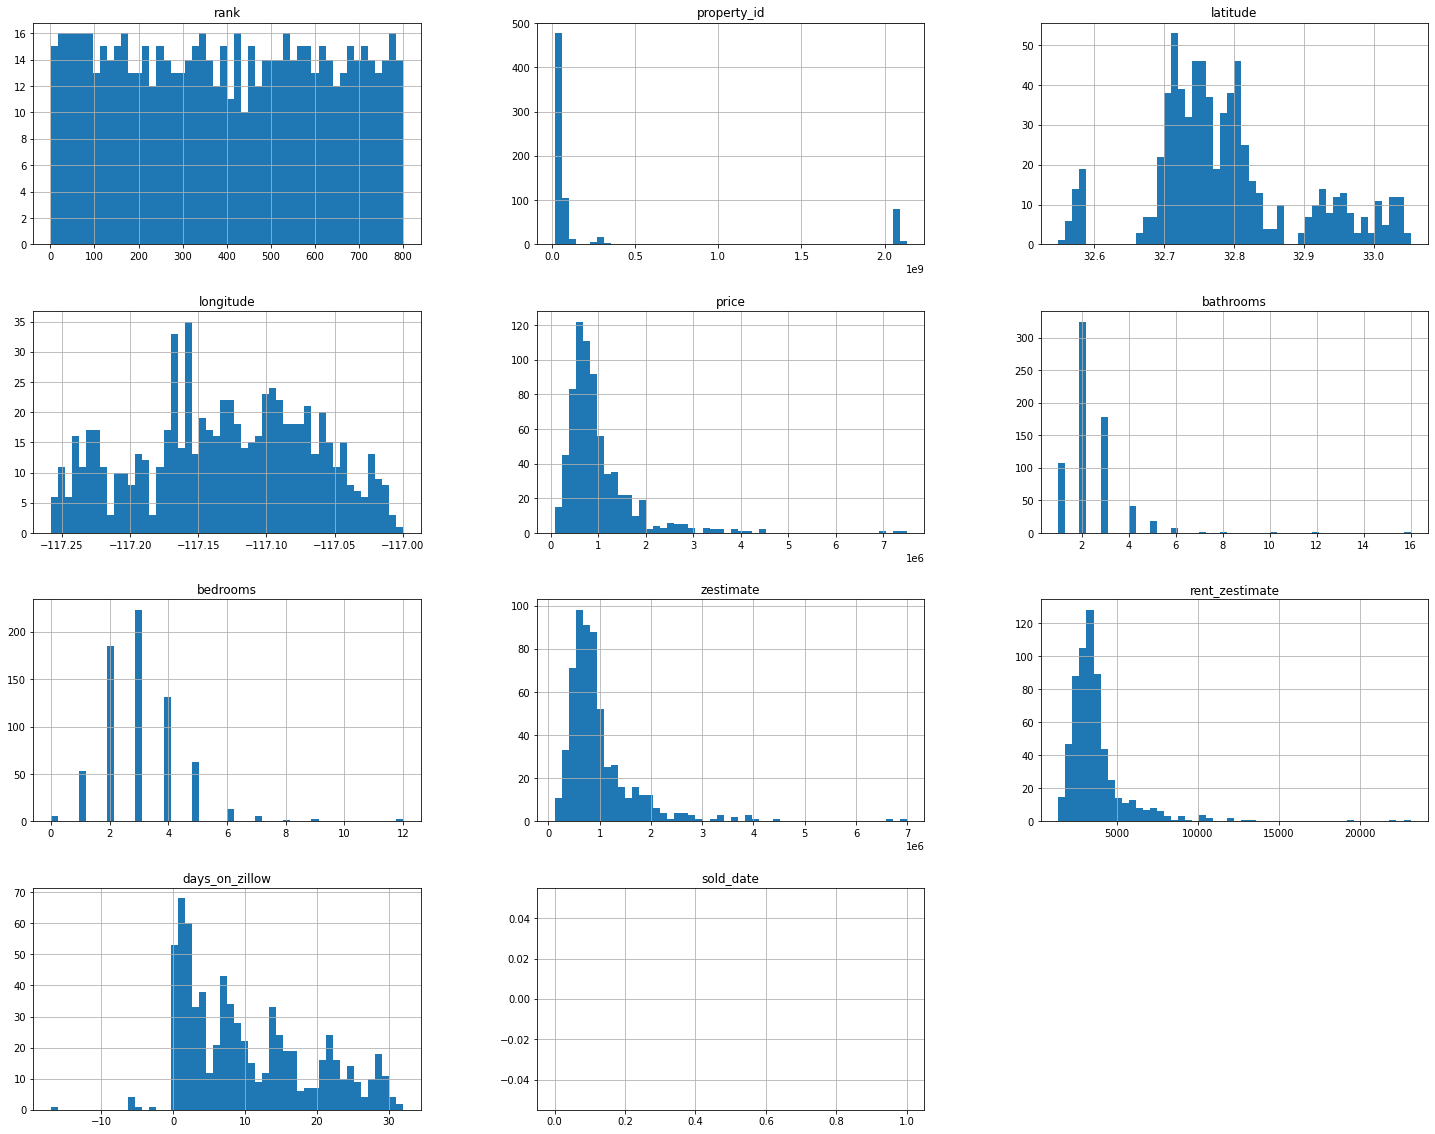

In [ ]:
df_sd[df_sd.dtypes[(df_sd.dtypes=="float64")|(df_sd.dtypes=="int64")]
                        .index.values].hist(bins=50, figsize=(25,20))

## **First DataSet Checking for Duplicates**

In [ ]:
# Checking to see if there are any duplicated data in dataset
df_sd[df_sd.duplicated() == True]

,rank,property_id,address,latitude,longitude,price,currency,bathrooms,bedrooms,area,land_area,zestimate,rent_zestimate,days_on_zillow,sold_date,is_zillow_owned,image,listing_type,broker_name,input,property_url,listing_url


## **First DataSet Cleaning**

In [ ]:
# Checking to see if there are any null values in our dataset.
df_sd.isnull().sum(axis = 0).sort_values(ascending = True)

rank                 0
input                0
listing_type         0
image                0
is_zillow_owned      0
property_url         0
listing_url          0
price                0
address              0
property_id          0
currency             0
longitude            1
latitude             1
days_on_zillow       2
bedrooms            25
bathrooms           27
area                32
rent_zestimate      81
zestimate          112
broker_name        505
land_area          690
sold_date          710
dtype: int64

In [ ]:
df_sd_clean = df_sd.drop(columns=['land_area', 'sold_date'])

In [ ]:
df_sd_clean.shape

(710, 20)

## **Dimensionality Reduction**

**PCA using only 20 Features of First DataSet, Accuracy is 0.881**

In [ ]:
# evaluate pca with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=688, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# define the pipeline
steps = [('pca', PCA(n_components=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.881 (0.031)


**NOTE:**

We will be doing PCA for Amalgamated and new features added later in the part

# **Scraping and Downloading New DataSet**

In [ ]:
# get zpids to a list
property_url_list = df_sd_clean['property_url'].tolist()

## **RAPID API for collecting the Zillow data for Data Enrichment (2nd DataSet)**

### **API KEY**

In [ ]:
# rapid_api_key = 'd6d7caed55msh863073849a9ce44p1eb378jsndeff93ec70b0'

### **API Call**

In [ ]:
# import requests

# # create empty list
# prop_detail_list = []

# # iterate through list of properties
# for property_url in property_url_list:

#   url = "https://zillow-com1.p.rapidapi.com/property"

#   querystring = {"property_url":property_url}

#   headers = {
#       'x-rapidapi-host': "zillow-com1.p.rapidapi.com",
#       'x-rapidapi-key': rapid_api_key
#       }

#   z_prop_detail_resp = requests.request("GET", url, headers=headers, params=querystring)
#   z_prop_detail_resp_json = z_prop_detail_resp.json()
#   # print(z_prop_detail_resp.text)
#   # wait 1 sec based on limit
#   time.sleep(1.5)

#   prop_detail_list.append(z_prop_detail_resp_json)

### **Converted the fetched data to a DataFrame**

In [ ]:
# # convert to dataframe
# df_z_prop_detail = pd.json_normalize(prop_detail_list)
# print('Num of rows:', len(df_z_prop_detail))
# print('Num of cols:', len(df_z_prop_detail.columns))
# df_z_prop_detail

### **Downloaded it into CSV File and Saved the DataSet**

In [ ]:
# # download file
# df_z_prop_detail.to_csv('df_z_prop_detail_output.csv')
# files.download('df_z_prop_detail_output.csv')

# **Amalgamating 2nd DataSet, Using the scraped one from above API call**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df_z_prop_detail_output = pd.read_csv("/content/drive/Shareddrives/Mid-term-San Diego/df_z_prop_detail_output.csv")
df_z_prop_detail_output = df_z_prop_detail_output.drop(columns=['Unnamed: 0'])
df_z_prop_detail_output

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,listingProvider,hoaFee,propertyTaxRate,contact_recipients,cityId,timeOnZillow,url,zestimate,imgSrc,livingAreaValue,nearbyHomes,zpid,streetAddress,county,zipcode,zestimateLowPercent,countyId,timeZone,homeType,livingAreaUnits,pageViewCount,livingArea,bathrooms,countyFIPS,state,taxHistory,building,stateId,yearBuilt,brokerageName,rentZestimate,isListedByOwner,description,buildingPermits,homeStatus,homeFacts,latitude,datePosted,bedrooms,propertyTypeDimension,price,priceHistory,favoriteCount,schools,zestimateHighPercent,mlsid,brokerId,city,providerListingID,country,currency,longitude,contingentListingType,solarPotential.sunScore,solarPotential.solarFactor,solarPotential.buildFactor,solarPotential.climateFactor,solarPotential.electricityFactor,mortgageRates.arm5Rate,mortgageRates.fifteenYearFixedRate,mortgageRates.thirtyYearFixedRate,address.city,address.neighborhood,address.state,address.streetAddress,address.zipcode,listed_by.agent_reason,listed_by.zpro,listed_by.recent_sales,listed_by.review_count,listed_by.display_name,listed_by.badge_type,listed_by.business_name,listed_by.rating_average,listed_by.phone.prefix,listed_by.phone.areacode,listed_by.phone.number,listed_by.zuid,listed_by.image_url,resoFacts.hasAttachedProperty,resoFacts.frontageType,resoFacts.buildingAreaSource,resoFacts.hasOpenParking,resoFacts.taxAnnualAmount,resoFacts.flooring,resoFacts.foundationDetails,resoFacts.accessibilityFeatures,resoFacts.associationAmenities,resoFacts.structureType,resoFacts.hasGarage,resoFacts.hasPetsAllowed,resoFacts.parcelNumber,resoFacts.topography,resoFacts.architecturalStyle,resoFacts.constructionMaterials,resoFacts.fireplaceFeatures,resoFacts.openParkingSpaces,resoFacts.appliances,resoFacts.associationPhone,resoFacts.bathroomsPartial,resoFacts.bathroomsHalf,resoFacts.associationName,resoFacts.associationFeeIncludes,resoFacts.buildingName,resoFacts.hasAssociation,resoFacts.taxAssessedValue,resoFacts.associationFee,resoFacts.hasAdditionalParcels,resoFacts.additionalParcelsDescription,resoFacts.canRaiseHorses,resoFacts.hasLandLease,resoFacts.isNewConstruction,resoFacts.isSeniorCommunity,resoFacts.aboveGradeFinishedArea,resoFacts.lotSizeDimensions,resoFacts.view,resoFacts.communityFeatures,resoFacts.yearBuilt,resoFacts.gas,resoFacts.highSchoolDistrict,resoFacts.bathroomsFull,resoFacts.highSchool,resoFacts.elementarySchool,resoFacts.rooms,resoFacts.carportSpaces,resoFacts.middleOrJuniorSchool,resoFacts.cityRegion,resoFacts.mainLevelBathrooms,resoFacts.hasPrivatePool,resoFacts.windowFeatures,resoFacts.landLeaseAmount,resoFacts.woodedArea,resoFacts.middleOrJuniorSchoolDistrict,resoFacts.associationPhone2,resoFacts.belowGradeFinishedArea,resoFacts.hasRentControl,resoFacts.frontageLength,resoFacts.storiesTotal,resoFacts.exteriorFeatures,resoFacts.heating,resoFacts.hasCooling,resoFacts.numberOfUnitsInCommunity,resoFacts.basement,resoFacts.greenWaterConservation,resoFacts.zoning,resoFacts.greenSustainability,resoFacts.hasFireplace,resoFacts.zoningDescription,resoFacts.greenIndoorAirQuality,resoFacts.garageSpaces,resoFacts.waterfrontFeatures,resoFacts.greenEnergyEfficient,resoFacts.greenBuildingVerificationType,resoFacts.utilities,resoFacts.waterSources,resoFacts.hasView,resoFacts.sewer,resoFacts.securityFeatures,resoFacts.hasElectricOnProperty,resoFacts.numberOfUnitsVacant,resoFacts.hasHomeWarranty,resoFacts.hasWaterfrontView,resoFacts.bathroomsOneQuarter,resoFacts.lotSize,resoFacts.hasSpa,resoFacts.builderModel,resoFacts.entryLevel,resoFacts.onMarketDate,resoFacts.yearBuiltEffective,resoFacts.developmentStatus,resoFacts.propertyCondition,resoFacts.homeType,resoFacts.spaFeatures,resoFacts.hasCarport,resoFacts.bathroomsThreeQuarter,resoFacts.livingArea,resoFacts.commonWalls,resoFacts.associationFee2,resoFacts.cooling,resoFacts.hasHeating,resoFacts.associationName2,resoFacts.otherStructures,resoFacts.elementarySchoolDistrict,resoFacts.coveredSpaces,resoFacts.parkingFeatures,resoFacts.buildingArea,resoFacts.furnished,resoFacts.vegetation,resoFacts

## **Fetching the Data which is required to amalgamate with the First DataSet**

In [ ]:
scrape_df = df_z_prop_detail_output[['zpid','hoaFee','propertyTaxRate','listed_by.rating_average','pageViewCount','mortgageRates.thirtyYearFixedRate']]
scrape_df

,zpid,hoaFee,propertyTaxRate,listed_by.rating_average,pageViewCount,mortgageRates.thirtyYearFixedRate
0,72109285,NaN,0.76,5.0,3253,2.904
1,88783088,NaN,0.76,5.0,3751,2.904
2,16779285,409.0,0.76,5.0,411,2.884
3,16833171,NaN,0.76,5.0,1023,2.904
4,2070170835,515.0,0.76,5.0,359,2.884
...,...,...,...,...,...,...
705,2068547283,NaN,0.76,0.0,385,2.901
706,250088480,NaN,0.76,5.0,196,2.884
707,16976039,NaN,0.76,5.0,1407,2.904
708,16872431,430.0,0.76,3.4,2622,2.904


1. **HOA, Propert Taxes Rate, 30 year Fixed Rate** Calculate the accurate Monthly Mortgage
2. Page View and Rating average for feature addition



# **Merging the first DataSet and the 2nd DataSet**

In [ ]:
final_df = pd.merge(df_sd_clean,scrape_df, left_on='property_id', right_on='zpid')
final_df

,rank,property_id,address,latitude,longitude,price,currency,bathrooms,bedrooms,area,zestimate,rent_zestimate,days_on_zillow,is_zillow_owned,image,listing_type,broker_name,input,property_url,listing_url,zpid,hoaFee,propertyTaxRate,listed_by.rating_average,pageViewCount,mortgageRates.thirtyYearFixedRate
0,728,72109285,"350 11th Ave UNIT 224, San Diego, CA 92101",32.708987,-117.154838,674900.0,USD,2.0,2.0,1078.0 sqft,NaN,NaN,25.0,False,https://photos.zillowstatic.com/fp/057244ef170...,Condo for sale,NaN,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/350-11th-Av...,"https://www.zillow.com/homes/San-Diego,-CA_rb/...",72109285,NaN,0.76,5.0,3253,2.904
1,778,88783088,"825 W Beech St UNIT 301, San Diego, CA 92101",32.720323,-117.170483,779000.0,USD,3.0,2.0,1282.0 sqft,774700.0,3566.0,29.0,False,https://photos.zillowstatic.com/fp/b65f7892a39...,Condo for sale,NaN,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/825-W-Beech...,"https://www.zillow.com/homes/San-Diego,-CA_rb/...",88783088,NaN,0.76,5.0,3751,2.904
2,5,16779285,"11254 Caminito Aclara, San Diego, CA 92126",32.923254,-117.170817,1050000.0,USD,3.0,4.0,2023.0 sqft,925800.0,4054.0,-6.0,False,https://photos.zillowstatic.com/fp/b7c97d48b0b...,Coming soon,Corcoran Global Living,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/11254-Camin...,"https://www.zillow.com/homes/San-Diego,-CA_rb/",16779285,409.0,0.76,5.0,411,2.884
3,120,16833171,"7867 Caffey Ln, San Diego, CA 92126",32.898896,-117.154676,774999.0,USD,2.0,2.0,1008.0 sqft,692400.0,2699.0,1.0,False,https://photos.zillowstatic.com/fp/28615d8f217...,House for sale,NaN,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/7867-Caffey...,"https://www.zillow.com/homes/San-Diego,-CA_rb/...",16833171,NaN,0.76,5.0,1023,2.904
4,116,2070170835,"2622 Avella Dr, San Diego, CA 92108",32.781070,-117.146380,1475000.0,USD,4.0,3.0,2124.0 sqft,NaN,4078.0,1.0,False,https://photos.zillowstatic.com/fp/17c13a5d1e8...,Condo for sale,NaN,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/2622-Avella...,"https://www.zillow.com/homes/San-Diego,-CA_rb/...",2070170835,515.0,0.76,5.0,359,2.884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,772,2068547283,"0 Cosoy Way 2 #-442-663, San Diego, CA 92103",32.755007,-117.193375,875000.0,USD,NaN,NaN,NaN,NaN,1996.0,29.0,False,https://photos.zillowstatic.com/fp/89772c00463...,Lot / Land for sale,NaN,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/0-Cosoy-Way...,"https://www.zillow.com/homes/San-Diego,-CA_rb/...",2068547283,NaN,0.76,0.0,385,2.901
712,28,250088480,"2883 B St, San Diego, CA 92102",32.717630,-117.131888,975000.0,USD,3.0,2.0,1565.0 sqft,NaN,NaN,0.0,False,https://photos.zillowstatic.com/fp/cde06a71d13...,Condo for sale,NaN,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/2883-B-St-S...,"https://www.zillow.com/homes/San-Diego,-CA_rb/",250088480,NaN,0.76,5.0,196,2.884
713,226,16976039,"3349 Myrtle Ave, San Diego, CA 92104",32.741798,-117.121475,839000.0,USD,1.0,2.0,816.0 sqft,884200.0,2910.0,3.0,False,https://photos.zillowstatic.com/fp/3fa2bf18ab6...,House for sale,NaN,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/3349-Myrtle...,"https://www.zillow.com/homes/San-Diego,-CA_rb/...",16976039,NaN,0.76,5.0,1407,2.904
714,637,16872431,"4769 Seda Dr, San Diego, CA 92124",32.826653,-117.076360,835000.0,USD,3.0,3.0,1906.0 sqft,859500.0,3556.0,20.0,False,https://photos.zillowstatic.com/fp/7ef2dd8eba6...,Townhouse for sale,NaN,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/4769-Seda-D...,"https://www.zillow.com/homes/San-Diego,-CA_rb/...",16872431,430.0,0.76,3.4,2622,2.904


# **Data Cleaning for Amalgamated 2nd DataSet**

In [ ]:
# cleaning dataset
final_df_clean = final_df.dropna(subset=['bedrooms', 'bathrooms','latitude','longitude'])
final_df_clean = final_df_clean.drop(columns=['zpid','broker_name'])

final_df_clean.shape

(688, 24)

Removing null rows of 'bedrooms', 'bathrooms','latitude','longitude' as these are not useful, people would not be interested to buy a property as they do not have these important details.


In [ ]:
final_df_clean.describe()

,rank,property_id,latitude,longitude,price,bathrooms,bedrooms,zestimate,rent_zestimate,days_on_zillow,hoaFee,propertyTaxRate,listed_by.rating_average,pageViewCount,mortgageRates.thirtyYearFixedRate
count,688.000000,6.880000e+02,688.000000,688.000000,6.880000e+02,688.000000,688.000000,5.960000e+02,618.000000,686.000000,305.000000,6.880000e+02,618.000000,688.000000,688.000000
mean,390.377907,2.333586e+08,32.789439,-117.129768,9.951255e+05,2.412791,3.068314,9.852503e+05,3807.344660,10.224490,398.957377,7.600000e-01,3.220065,1843.579942,2.904580
std,235.348779,5.986845e+08,0.106807,0.063982,7.337591e+05,1.230831,1.369128,7.058980e+05,2064.724725,9.114153,373.439659,6.332875e-15,2.354179,1942.764924,0.045793
min,1.000000,1.673506e+07,32.561281,-117.258185,8.500000e+04,1.000000,0.000000,1.214000e+05,1397.000000,-17.000000,25.000000,7.600000e-01,0.000000,49.000000,2.884000
25%,179.750000,1.693312e+07,32.720860,-117.170595,5.927500e+05,2.000000,2.000000,5.880045e+05,2792.000000,2.000000,215.000000,7.600000e-01,0.000000,739.500000,2.884000
50%,383.500000,1.706564e+07,32.766891,-117.127857,7.990000e+05,2.000000,3.000000,8.019500e+05,3398.000000,8.000000,340.000000,7.600000e-01,5.000000,1428.500000,2.904000
75%,593.500000,6.395879e+07,32.826418,-117.079727,1.167400e+06,3.000000,4.000000,1.101800e+06,4038.000000,16.000000,440.000000,7.600000e-01,5.000000,2392.750000,2.904000
max,800.000000,2.133748e+09,33.052774,-116.999709,7.495000e+06,16.000000,12.000000,6.990200e+06,23140.000000,32.000000,3260.000000,7.600000e-01,5.000000,32160.000000,3.341000


In [ ]:
final_df_clean.isnull().sum(axis = 0).sort_values(ascending = True)

rank                                   0
propertyTaxRate                        0
listing_url                            0
property_url                           0
input                                  0
listing_type                           0
image                                  0
is_zillow_owned                        0
pageViewCount                          0
mortgageRates.thirtyYearFixedRate      0
bedrooms                               0
bathrooms                              0
currency                               0
price                                  0
longitude                              0
latitude                               0
address                                0
property_id                            0
days_on_zillow                         2
area                                  10
listed_by.rating_average              70
rent_zestimate                        70
zestimate                             92
hoaFee                               383
dtype: int64

In [ ]:
final_df_clean = final_df_clean.fillna({'hoaFee':0})
final_df_clean = final_df_clean.fillna({'rent_zestimate':3807.3})
final_df_clean = final_df_clean.fillna({'zestimate':985250.3})
final_df_clean = final_df_clean.fillna({'days_on_zillow':0})
final_df_clean = final_df_clean.fillna({'listed_by.rating_average':3.2})
final_df_clean = final_df_clean.fillna({'area':"1500 sqft"})

final_df_clean.isnull().sum(axis = 0).sort_values(ascending = True)

rank                                 0
listed_by.rating_average             0
propertyTaxRate                      0
hoaFee                               0
listing_url                          0
property_url                         0
input                                0
listing_type                         0
image                                0
is_zillow_owned                      0
days_on_zillow                       0
rent_zestimate                       0
zestimate                            0
area                                 0
bedrooms                             0
bathrooms                            0
currency                             0
price                                0
longitude                            0
latitude                             0
address                              0
property_id                          0
pageViewCount                        0
mortgageRates.thirtyYearFixedRate    0
dtype: int64

In [ ]:
final_df_clean

,rank,property_id,address,latitude,longitude,price,currency,bathrooms,bedrooms,area,zestimate,rent_zestimate,days_on_zillow,is_zillow_owned,image,listing_type,input,property_url,listing_url,hoaFee,propertyTaxRate,listed_by.rating_average,pageViewCount,mortgageRates.thirtyYearFixedRate
0,728,72109285,"350 11th Ave UNIT 224, San Diego, CA 92101",32.708987,-117.154838,674900.0,USD,2.0,2.0,1078.0 sqft,985250.3,3807.3,25.0,False,https://photos.zillowstatic.com/fp/057244ef170...,Condo for sale,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/350-11th-Av...,"https://www.zillow.com/homes/San-Diego,-CA_rb/...",0.0,0.76,5.0,3253,2.904
1,778,88783088,"825 W Beech St UNIT 301, San Diego, CA 92101",32.720323,-117.170483,779000.0,USD,3.0,2.0,1282.0 sqft,774700.0,3566.0,29.0,False,https://photos.zillowstatic.com/fp/b65f7892a39...,Condo for sale,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/825-W-Beech...,"https://www.zillow.com/homes/San-Diego,-CA_rb/...",0.0,0.76,5.0,3751,2.904
2,5,16779285,"11254 Caminito Aclara, San Diego, CA 92126",32.923254,-117.170817,1050000.0,USD,3.0,4.0,2023.0 sqft,925800.0,4054.0,-6.0,False,https://photos.zillowstatic.com/fp/b7c97d48b0b...,Coming soon,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/11254-Camin...,"https://www.zillow.com/homes/San-Diego,-CA_rb/",409.0,0.76,5.0,411,2.884
3,120,16833171,"7867 Caffey Ln, San Diego, CA 92126",32.898896,-117.154676,774999.0,USD,2.0,2.0,1008.0 sqft,692400.0,2699.0,1.0,False,https://photos.zillowstatic.com/fp/28615d8f217...,House for sale,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/7867-Caffey...,"https://www.zillow.com/homes/San-Diego,-CA_rb/...",0.0,0.76,5.0,1023,2.904
4,116,2070170835,"2622 Avella Dr, San Diego, CA 92108",32.781070,-117.146380,1475000.0,USD,4.0,3.0,2124.0 sqft,985250.3,4078.0,1.0,False,https://photos.zillowstatic.com/fp/17c13a5d1e8...,Condo for sale,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/2622-Avella...,"https://www.zillow.com/homes/San-Diego,-CA_rb/...",515.0,0.76,5.0,359,2.884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,114,16995112,"4941 Campanile Dr, San Diego, CA 92115",32.767198,-117.071329,1075000.0,USD,3.0,4.0,2028.0 sqft,1099700.0,4528.0,1.0,False,https://photos.zillowstatic.com/fp/e6e8e6d4ce9...,House for sale,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/4941-Campan...,"https://www.zillow.com/homes/San-Diego,-CA_rb/...",0.0,0.76,0.0,451,2.884
712,28,250088480,"2883 B St, San Diego, CA 92102",32.717630,-117.131888,975000.0,USD,3.0,2.0,1565.0 sqft,985250.3,3807.3,0.0,False,https://photos.zillowstatic.com/fp/cde06a71d13...,Condo for sale,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/2883-B-St-S...,"https://www.zillow.com/homes/San-Diego,-CA_rb/",0.0,0.76,5.0,196,2.884
713,226,16976039,"3349 Myrtle Ave, San Diego, CA 92104",32.741798,-117.121475,839000.0,USD,1.0,2.0,816.0 sqft,884200.0,2910.0,3.0,False,https://photos.zillowstatic.com/fp/3fa2bf18ab6...,House for sale,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/3349-Myrtle...,"https://www.zillow.com/homes/San-Diego,-CA_rb/...",0.0,0.76,5.0,1407,2.904
714,637,16872431,"4769 Seda Dr, San Diego, CA 92124",32.826653,-117.076360,835000.0,USD,3.0,3.0,1906.0 sqft,859500.0,3556.0,20.0,False,https://photos.zillowstatic.com/fp/7ef2dd8eba6...,Townhouse for sale,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/4769-Seda-D...,"https://www.zillow.com/homes/San-Diego,-CA_rb/...",430.0,0.76,3.4,2622,2.904


# **Adding the New Features**

## **Monthly Mortgage and Property Tax Price**

In [ ]:
import math

property_tax_rate_list = final_df_clean['propertyTaxRate'].tolist()
price_list = final_df_clean['price'].tolist()
thirty_Year_Fixed_Rate_list = final_df_clean['mortgageRates.thirtyYearFixedRate'].tolist()
hoaFee_list = final_df_clean['hoaFee'].tolist()
mortgate_val = []
property_tax_price = []

for a,b,c,d in zip(price_list,thirty_Year_Fixed_Rate_list,hoaFee_list,property_tax_rate_list):
  # down_payment = a * 0.2
  p = 0.8 * a
  rate = b/100
  r = rate/12
  n = 30 * 12
  compute_val = math.pow( 1+r,n)
  top_val = p * (r *compute_val)
  bottom_val = compute_val -1
  actual_val = top_val/bottom_val
  actual_val = actual_val + c

  t_rate = d/100
  t_amount = a * t_rate
  t_amount = t_amount/12
  property_tax_price.append(t_amount)

  actual_val = actual_val + t_amount
  
  mortgate_val.append(actual_val)
# print(mortgate_val)

final_df_clean['monthly_mortgage'] = mortgate_val
final_df_clean['property_tax_price'] = property_tax_price
final_df_clean

,rank,property_id,address,latitude,longitude,price,currency,bathrooms,bedrooms,area,zestimate,rent_zestimate,days_on_zillow,is_zillow_owned,image,listing_type,input,property_url,listing_url,hoaFee,propertyTaxRate,listed_by.rating_average,pageViewCount,mortgageRates.thirtyYearFixedRate,monthly_mortgage,property_tax_price
0,728,72109285,"350 11th Ave UNIT 224, San Diego, CA 92101",32.708987,-117.154838,674900.0,USD,2.0,2.0,1078.0 sqft,985250.3,3807.3,25.0,False,https://photos.zillowstatic.com/fp/057244ef170...,Condo for sale,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/350-11th-Av...,"https://www.zillow.com/homes/San-Diego,-CA_rb/...",0.0,0.76,5.0,3253,2.904,2675.902214,427.436667
1,778,88783088,"825 W Beech St UNIT 301, San Diego, CA 92101",32.720323,-117.170483,779000.0,USD,3.0,2.0,1282.0 sqft,774700.0,3566.0,29.0,False,https://photos.zillowstatic.com/fp/b65f7892a39...,Condo for sale,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/825-W-Beech...,"https://www.zillow.com/homes/San-Diego,-CA_rb/...",0.0,0.76,5.0,3751,2.904,3088.646947,493.366667
2,5,16779285,"11254 Caminito Aclara, San Diego, CA 92126",32.923254,-117.170817,1050000.0,USD,3.0,4.0,2023.0 sqft,925800.0,4054.0,-6.0,False,https://photos.zillowstatic.com/fp/b7c97d48b0b...,Coming soon,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/11254-Camin...,"https://www.zillow.com/homes/San-Diego,-CA_rb/",409.0,0.76,5.0,411,2.884,4563.139086,665.000000
3,120,16833171,"7867 Caffey Ln, San Diego, CA 92126",32.898896,-117.154676,774999.0,USD,2.0,2.0,1008.0 sqft,692400.0,2699.0,1.0,False,https://photos.zillowstatic.com/fp/28615d8f217...,House for sale,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/7867-Caffey...,"https://www.zillow.com/homes/San-Diego,-CA_rb/...",0.0,0.76,5.0,1023,2.904,3072.783434,490.832700
4,116,2070170835,"2622 Avella Dr, San Diego, CA 92108",32.781070,-117.146380,1475000.0,USD,4.0,3.0,2124.0 sqft,985250.3,4078.0,1.0,False,https://photos.zillowstatic.com/fp/17c13a5d1e8...,Condo for sale,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/2622-Avella...,"https://www.zillow.com/homes/San-Diego,-CA_rb/...",515.0,0.76,5.0,359,2.884,6350.576334,934.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,114,16995112,"4941 Campanile Dr, San Diego, CA 92115",32.767198,-117.071329,1075000.0,USD,3.0,4.0,2028.0 sqft,1099700.0,4528.0,1.0,False,https://photos.zillowstatic.com/fp/e6e8e6d4ce9...,House for sale,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/4941-Campan...,"https://www.zillow.com/homes/San-Diego,-CA_rb/...",0.0,0.76,0.0,451,2.884,4253.047159,680.833333
712,28,250088480,"2883 B St, San Diego, CA 92102",32.717630,-117.131888,975000.0,USD,3.0,2.0,1565.0 sqft,985250.3,3807.3,0.0,False,https://photos.zillowstatic.com/fp/cde06a71d13...,Condo for sale,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/2883-B-St-S...,"https://www.zillow.com/homes/San-Diego,-CA_rb/",0.0,0.76,5.0,196,2.884,3857.414865,617.500000
713,226,16976039,"3349 Myrtle Ave, San Diego, CA 92104",32.741798,-117.121475,839000.0,USD,1.0,2.0,816.0 sqft,884200.0,2910.0,3.0,False,https://photos.zillowstatic.com/fp/3fa2bf18ab6...,House for sale,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/3349-Myrtle...,"https://www.zillow.com/homes/San-Diego,-CA_rb/...",0.0,0.76,5.0,1407,2.904,3326.540165,531.366667
714,637,16872431,"4769 Seda Dr, San Diego, CA 92124",32.826653,-117.076360,835000.0,USD,3.0,3.0,1906.0 sqft,859500.0,3556.0,20.0,False,https://photos.zillowstatic.com/fp/7ef2dd8eba6...,Townhouse for sale,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/4769-Seda-D...,"https://www.zillow.com/homes/San-Diego,-CA_rb/...",430.0,0.76,3.4

## **Classifying Investments as Good or Bad**

In [ ]:
def good_investment(x,y):
  val = x - y
  if val > 0:
      return 1
  else:
      return 0
    
final_df_clean.insert(26, "investment", final_df_clean.apply(lambda row: good_investment(row['rent_zestimate'],row['monthly_mortgage']), axis=1))

# **Data Preparation**


## **2nd DataSet Feature Transformation**

In [ ]:
def quick_analysis(final_df_clean):
 print("Data Types:")
 print(final_df_clean.dtypes)
 print("Rows and Columns:")
 print(final_df_clean.shape)
 print("Column Names:")
 print(final_df_clean.columns)
 print("Null Values:")
 print(final_df_clean.apply(lambda x: sum(x.isnull()) / len(final_df_clean)))
quick_analysis(final_df_clean)

Data Types:
rank                                   int64
property_id                            int64
address                               object
latitude                             float64
longitude                            float64
price                                float64
currency                              object
bathrooms                            float64
bedrooms                             float64
area                                  object
zestimate                            float64
rent_zestimate                       float64
days_on_zillow                       float64
is_zillow_owned                         bool
image                                 object
listing_type                          object
input                                 object
property_url                          object
listing_url                           object
hoaFee                               float64
propertyTaxRate                      float64
listed_by.rating_average             float6

In [ ]:
final_df_clean['is_zillow_owned'].replace({False: 0}, inplace=True)
final_df_clean['is_zillow_owned'].replace({True: 1}, inplace=True)

## **2nd Dataset Description**

In [ ]:
final_df_clean.describe()


,rank,property_id,latitude,longitude,price,bathrooms,bedrooms,zestimate,rent_zestimate,days_on_zillow,is_zillow_owned,hoaFee,propertyTaxRate,listed_by.rating_average,pageViewCount,mortgageRates.thirtyYearFixedRate,monthly_mortgage,property_tax_price,investment
count,688.000000,6.880000e+02,688.000000,688.000000,6.880000e+02,688.000000,688.000000,6.880000e+02,688.000000,688.000000,688.000000,688.000000,6.880000e+02,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,390.377907,2.333586e+08,32.789439,-117.129768,9.951255e+05,2.412791,3.068314,9.852503e+05,3807.340116,10.194767,0.039244,176.863372,7.600000e-01,3.218023,1843.579942,2.904580,4118.002716,630.246148,0.540698
std,235.348779,5.986845e+08,0.106807,0.063982,7.337591e+05,1.230831,1.369128,6.569345e+05,1956.709583,9.117533,0.194317,317.880135,6.332875e-15,2.231029,1942.764924,0.045793,2917.431411,464.714068,0.498704
min,1.000000,1.673506e+07,32.561281,-117.258185,8.500000e+04,1.000000,0.000000,1.214000e+05,1397.000000,-17.000000,0.000000,0.000000,7.600000e-01,0.000000,49.000000,2.884000,353.180445,53.833333,0.000000
25%,179.750000,1.693312e+07,32.720860,-117.170595,5.927500e+05,2.000000,2.000000,6.245750e+05,2828.000000,2.000000,0.000000,0.000000,7.600000e-01,0.000000,739.500000,2.884000,2501.620092,375.408333,0.000000
50%,383.500000,1.706564e+07,32.766891,-117.127857,7.990000e+05,2.000000,3.000000,8.775500e+05,3495.000000,8.000000,0.000000,0.000000,7.600000e-01,4.900000,1428.500000,2.904000,3288.480521,506.033333,1.000000
75%,593.500000,6.395879e+07,32.826418,-117.079727,1.167400e+06,3.000000,4.000000,1.025575e+06,3913.000000,16.000000,0.000000,306.250000,7.600000e-01,5.000000,2392.750000,2.904000,4743.631203,739.353333,1.000000
max,800.000000,2.133748e+09,33.052774,-116.999709,7.495000e+06,16.000000,12.000000,6.990200e+06,23140.000000,32.000000,1.000000,3260.000000,7.600000e-01,5.000000,32160.000000,3.341000,30177.640425,4746.833333,1.000000


## **2nd DataSet Histogram Plot**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f50807cfcd0>,
      dtype=object)

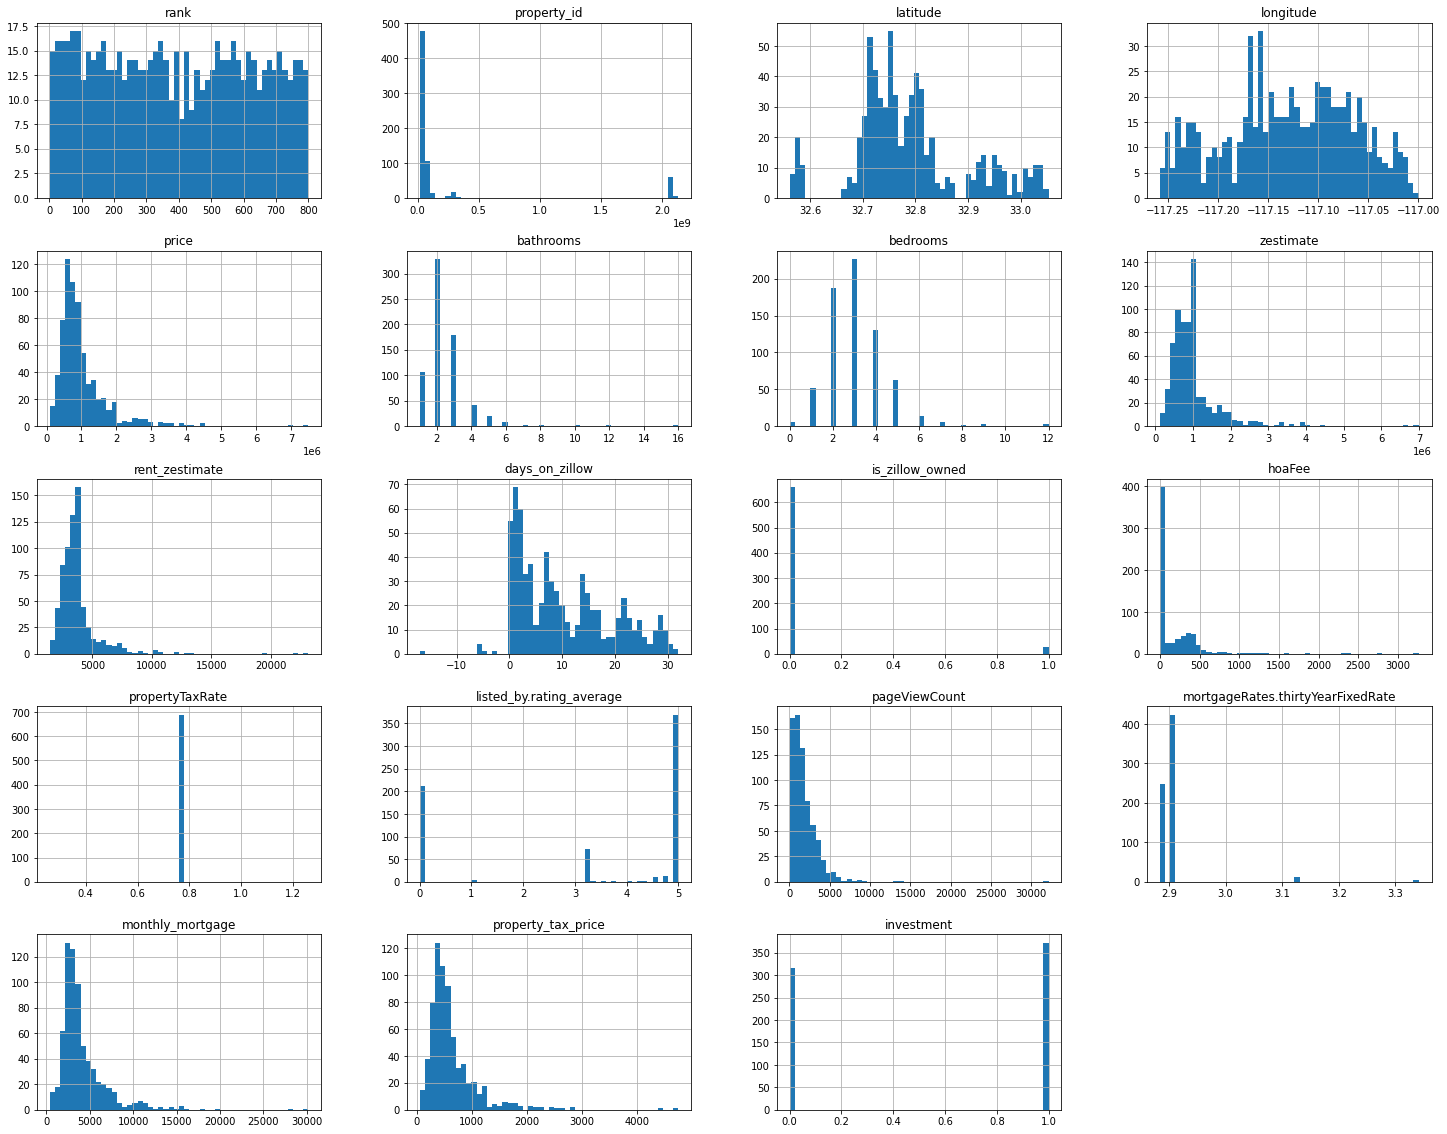

In [ ]:
final_df_clean[final_df_clean.dtypes[(final_df_clean.dtypes=="float64")|(final_df_clean.dtypes=="int64")]
                        .index.values].hist(bins=50, figsize=(25,20))

# **Amalgamating 3rd DataSet**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df_z_street_detail = pd.read_csv("/content/drive/Shareddrives/Mid-term-San Diego/crimes_merge_all.csv")
df_z_street_detail = df_z_street_detail.drop(columns=['Unnamed: 0'])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_crime_sd = df_z_street_detail[df_z_street_detail['County'].str.contains('San Diego')]
df_crime_sd

,Zip Code,County,Assault Risk,Burglary Risk,Larceny Risk,Murder Risk,Motor Vehicle Theft Risk,Personal Crime Risk,Property Crime Risk,Rape Risk,Robbery Risk,Total Crime Risk,Median household income,Population Density,fips,Closest City,State,Zhvi,zrmpsqf,Zhvisf,Zhmpsqf,spf,Zriahsum,Zrisf
118,91910,San Diego County,139,105,79,43,306,177,134,373,116,143,56077,6549.0,6073,"San Diego city, CA",California,535700,1.575485,556700.0,315.0,NaN,2494.0,2603.0
182,92126,San Diego County,74,63,76,87,162,83,83,43,117,77,86252,6380.7,6073,"San Diego city, CA",California,607100,1.848049,623800.0,415.0,NaN,2600.0,2679.0
196,91911,San Diego County,94,62,91,71,222,122,102,217,84,103,50036,7384.6,6073,"San Diego city, CA",California,486200,NaN,496500.0,319.0,NaN,2426.0,2451.0
229,92101,San Diego County,165,93,141,76,299,114,147,48,135,122,65636,9190.2,6073,"San Diego city, CA",California,593800,NaN,627200.0,579.0,NaN,2645.0,2590.0
230,92109,San Diego County,157,118,172,94,370,118,182,56,136,141,75529,6231.8,6073,"San Diego city, CA",California,960300,3.060000,1239000.0,662.0,NaN,3005.0,3809.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5200,92010,San Diego County,71,70,99,130,113,77,79,36,59,73,80706,1864.5,6073,"San Diego city, CA",California,767900,NaN,787200.0,383.0,NaN,3025.0,3102.0
5244,91902,San Diego County,89,108,57,58,117,96,81,188,30,81,88052,2067.6,6073,"San Diego city, CA",California,683200,NaN,702500.0,306.0,NaN,2981.0,3018.0
5941,92007,San Diego County,70,95,81,54,206,54,106,27,57,76,99143,4412.7,6073,"San Diego city, CA",California,1302400,NaN,1332600.0,696.0,0.0,3592.0,3901.0
6082,91914,San Diego County,31,17,28,98,45,54,25,45,37,36,109604,2649.7,6073,"San Diego city, CA",California,688900,NaN,735000.0,284.0,NaN,3173.0,3303.0


In [ ]:
street_list = final_df_clean['address'].values.tolist()
street_actual_list = []
for i in street_list:
  zipcode = i.split(',')[2].split(' ')[2]
  street_actual_list.append(zipcode)

# print(street_actual_list)
final_df_clean['zipCode'] = street_actual_list
final_df_clean['zipCode'] = final_df_clean['zipCode'].astype(str).astype(int)
final_df_clean


,rank,property_id,address,latitude,longitude,price,currency,bathrooms,bedrooms,area,zestimate,rent_zestimate,days_on_zillow,is_zillow_owned,image,listing_type,input,property_url,listing_url,hoaFee,propertyTaxRate,listed_by.rating_average,pageViewCount,mortgageRates.thirtyYearFixedRate,monthly_mortgage,property_tax_price,investment,zipCode
0,728,72109285,"350 11th Ave UNIT 224, San Diego, CA 92101",32.708987,-117.154838,674900.0,USD,2.0,2.0,1078.0 sqft,985250.3,3807.3,25.0,0,https://photos.zillowstatic.com/fp/057244ef170...,Condo for sale,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/350-11th-Av...,"https://www.zillow.com/homes/San-Diego,-CA_rb/...",0.0,0.76,5.0,3253,2.904,2675.902214,427.436667,1,92101
1,778,88783088,"825 W Beech St UNIT 301, San Diego, CA 92101",32.720323,-117.170483,779000.0,USD,3.0,2.0,1282.0 sqft,774700.0,3566.0,29.0,0,https://photos.zillowstatic.com/fp/b65f7892a39...,Condo for sale,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/825-W-Beech...,"https://www.zillow.com/homes/San-Diego,-CA_rb/...",0.0,0.76,5.0,3751,2.904,3088.646947,493.366667,1,92101
2,5,16779285,"11254 Caminito Aclara, San Diego, CA 92126",32.923254,-117.170817,1050000.0,USD,3.0,4.0,2023.0 sqft,925800.0,4054.0,-6.0,0,https://photos.zillowstatic.com/fp/b7c97d48b0b...,Coming soon,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/11254-Camin...,"https://www.zillow.com/homes/San-Diego,-CA_rb/",409.0,0.76,5.0,411,2.884,4563.139086,665.000000,0,92126
3,120,16833171,"7867 Caffey Ln, San Diego, CA 92126",32.898896,-117.154676,774999.0,USD,2.0,2.0,1008.0 sqft,692400.0,2699.0,1.0,0,https://photos.zillowstatic.com/fp/28615d8f217...,House for sale,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/7867-Caffey...,"https://www.zillow.com/homes/San-Diego,-CA_rb/...",0.0,0.76,5.0,1023,2.904,3072.783434,490.832700,0,92126
4,116,2070170835,"2622 Avella Dr, San Diego, CA 92108",32.781070,-117.146380,1475000.0,USD,4.0,3.0,2124.0 sqft,985250.3,4078.0,1.0,0,https://photos.zillowstatic.com/fp/17c13a5d1e8...,Condo for sale,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/2622-Avella...,"https://www.zillow.com/homes/San-Diego,-CA_rb/...",515.0,0.76,5.0,359,2.884,6350.576334,934.166667,0,92108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,114,16995112,"4941 Campanile Dr, San Diego, CA 92115",32.767198,-117.071329,1075000.0,USD,3.0,4.0,2028.0 sqft,1099700.0,4528.0,1.0,0,https://photos.zillowstatic.com/fp/e6e8e6d4ce9...,House for sale,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/4941-Campan...,"https://www.zillow.com/homes/San-Diego,-CA_rb/...",0.0,0.76,0.0,451,2.884,4253.047159,680.833333,1,92115
712,28,250088480,"2883 B St, San Diego, CA 92102",32.717630,-117.131888,975000.0,USD,3.0,2.0,1565.0 sqft,985250.3,3807.3,0.0,0,https://photos.zillowstatic.com/fp/cde06a71d13...,Condo for sale,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/2883-B-St-S...,"https://www.zillow.com/homes/San-Diego,-CA_rb/",0.0,0.76,5.0,196,2.884,3857.414865,617.500000,0,92102
713,226,16976039,"3349 Myrtle Ave, San Diego, CA 92104",32.741798,-117.121475,839000.0,USD,1.0,2.0,816.0 sqft,884200.0,2910.0,3.0,0,https://photos.zillowstatic.com/fp/3fa2bf18ab6...,House for sale,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/3349-Myrtle...,"https://www.zillow.com/homes/San-Diego,-CA_rb/...",0.0,0.76,5.0,1407,2.904,3326.540165,531.366667,0,92104
714,637,16872431,"4769 Seda Dr, San Diego, CA 92124",32.826653,-117.076360,835000.0,USD,3.0,3.0,1906.0 sqft,859500.0,3556.0,20.0,0,https://photos.zillowstatic.com/fp/7ef2dd8eba6...,Townhouse for sale,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/4769-Seda-D...,"https://ww

In [ ]:
crime_df_final = df_crime_sd[['Total Crime Risk','Zip Code','Median household income']]
crime_df_final.dtypes

Total Crime Risk           int64
Zip Code                   int64
Median household income    int64
dtype: object

In [ ]:
final_df_invest_crime = pd.merge(final_df_clean,crime_df_final, left_on='zipCode', right_on='Zip Code')
final_df_invest_crime


,rank,property_id,address,latitude,longitude,price,currency,bathrooms,bedrooms,area,zestimate,rent_zestimate,days_on_zillow,is_zillow_owned,image,listing_type,input,property_url,listing_url,hoaFee,propertyTaxRate,listed_by.rating_average,pageViewCount,mortgageRates.thirtyYearFixedRate,monthly_mortgage,property_tax_price,investment,zipCode,Total Crime Risk,Zip Code,Median household income
0,728,72109285,"350 11th Ave UNIT 224, San Diego, CA 92101",32.708987,-117.154838,674900.0,USD,2.0,2.0,1078.0 sqft,985250.3,3807.3,25.0,0,https://photos.zillowstatic.com/fp/057244ef170...,Condo for sale,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/350-11th-Av...,"https://www.zillow.com/homes/San-Diego,-CA_rb/...",0.0,0.76,5.0,3253,2.904,2675.902214,427.436667,1,92101,122,92101,65636
1,778,88783088,"825 W Beech St UNIT 301, San Diego, CA 92101",32.720323,-117.170483,779000.0,USD,3.0,2.0,1282.0 sqft,774700.0,3566.0,29.0,0,https://photos.zillowstatic.com/fp/b65f7892a39...,Condo for sale,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/825-W-Beech...,"https://www.zillow.com/homes/San-Diego,-CA_rb/...",0.0,0.76,5.0,3751,2.904,3088.646947,493.366667,1,92101,122,92101,65636
2,506,63777063,"1501 Front St UNIT 514, San Diego, CA 92101",32.721431,-117.164306,514888.0,USD,1.0,1.0,845.0 sqft,514900.0,2490.0,13.0,0,https://photos.zillowstatic.com/fp/e3e498c41dc...,Condo for sale,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/1501-Front-...,"https://www.zillow.com/homes/San-Diego,-CA_rb/...",416.0,0.76,5.0,384,2.911,2459.017550,326.095733,1,92101,122,92101,65636
3,3,2067951176,"700 Habor St #506, San Diego, CA 92101",32.712102,-117.169690,959900.0,USD,2.0,2.0,1338.0 sqft,985250.3,3807.3,-6.0,0,https://photos.zillowstatic.com/fp/0e862d6763b...,Coming soon,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/700-Habor-S...,"https://www.zillow.com/homes/San-Diego,-CA_rb/",1186.0,0.76,5.0,245,2.884,4983.674389,607.936667,0,92101,122,92101,65636
4,121,63790538,"1150 J St UNIT 222, San Diego, CA 92101",32.709724,-117.154188,374900.0,USD,1.0,0.0,744.0 sqft,356700.0,2100.0,1.0,0,https://photos.zillowstatic.com/fp/9c8e8636b81...,Condo for sale,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/1150-J-St-U...,"https://www.zillow.com/homes/San-Diego,-CA_rb/...",425.0,0.76,3.2,485,2.911,1912.560944,237.436667,1,92101,122,92101,65636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,225,16769709,"13386 Tiverton Rd, San Diego, CA 92130",32.959767,-117.235541,768000.0,USD,2.0,2.0,1063.0 sqft,798900.0,2984.0,3.0,0,https://photos.zillowstatic.com/fp/0ec509c3815...,House for sale,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/13386-Tiver...,"https://www.zillow.com/homes/San-Diego,-CA_rb/...",290.0,0.76,5.0,3032,2.904,3335.033190,486.400000,0,92130,27,92130,132069
517,526,16777936,"11339 Carmel Creek Rd, San Diego, CA 92130",32.923243,-117.224793,1275000.0,USD,3.0,2.0,1410.0 sqft,1318600.0,3599.0,14.0,0,https://photos.zillowstatic.com/fp/d130effbd93...,Condo for sale,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/11339-Carme...,"https://www.zillow.com/homes/San-Diego,-CA_rb/...",235.0,0.76,5.0,2330,2.884,5279.311747,807.500000,0,92130,27,92130,132069
518,795,16769149,"13668 Landfair Rd, San Diego, CA 92130",32.962944,-117.235067,2595000.0,USD,4.0,4.0,3071.0 sqft,2123000.0,6966.0,31.0,0,https://photos.zillowstatic.com/fp/88c1fe1f086...,House for sale,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/13668-Landf...,"https://www.zillow.com/homes/San-Diego,-CA_rb/...",110.0,0.76,0.0,4844,2.884,10376.658026,1643.500000,0,92130,27,92130,132069
519,242,16768574,"12815 Via Nieve UNIT 59, San Diego, CA 92130",32.949410,-117.22

In [ ]:
final_df_invest_crime = final_df_invest_crime.drop(['Zip Code'],axis=1)
final_df_invest_crime.describe()


,rank,property_id,latitude,longitude,price,bathrooms,bedrooms,zestimate,rent_zestimate,days_on_zillow,is_zillow_owned,hoaFee,propertyTaxRate,listed_by.rating_average,pageViewCount,mortgageRates.thirtyYearFixedRate,monthly_mortgage,property_tax_price,investment,zipCode,Total Crime Risk,Median household income
count,521.000000,5.210000e+02,521.000000,521.000000,5.210000e+02,521.000000,521.000000,5.210000e+02,521.000000,521.000000,521.000000,521.000000,5.210000e+02,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000
mean,380.120921,2.630822e+08,32.793946,-117.131590,1.016232e+06,2.404990,3.055662,9.982625e+05,3861.126104,9.821497,0.038388,188.790787,7.600000e-01,3.329750,1810.261036,2.906115,4213.466561,643.613718,0.537428,92116.907869,92.714012,72259.454894
std,237.083706,6.327539e+08,0.116900,0.064619,7.916582e+05,1.331242,1.460628,7.019452e+05,2137.167784,9.144187,0.192315,348.345878,5.445321e-15,2.188374,2006.675931,0.051246,3160.792131,501.383507,0.499076,14.173620,33.981737,23020.779230
min,1.000000,1.673506e+07,32.561281,-117.258185,8.500000e+04,1.000000,0.000000,1.214000e+05,1397.000000,-17.000000,0.000000,0.000000,7.600000e-01,0.000000,49.000000,2.884000,353.180445,53.833333,0.000000,92101.000000,27.000000,37985.000000
25%,170.000000,1.692778e+07,32.720362,-117.170817,5.890000e+05,2.000000,2.000000,6.225730e+05,2799.000000,2.000000,0.000000,0.000000,7.600000e-01,0.000000,683.000000,2.884000,2497.878789,373.033333,0.000000,92105.000000,60.000000,57946.000000
50%,362.000000,1.708222e+07,32.760022,-117.133034,7.999000e+05,2.000000,3.000000,8.780000e+05,3499.000000,7.000000,0.000000,0.000000,7.600000e-01,4.900000,1399.000000,2.904000,3290.069746,506.603333,1.000000,92115.000000,102.000000,68260.000000
75%,592.000000,6.740417e+07,32.847589,-117.080060,1.188000e+06,3.000000,4.000000,1.020500e+06,3934.000000,16.000000,0.000000,310.000000,7.600000e-01,5.000000,2351.000000,2.904000,4876.713985,752.400000,1.000000,92127.000000,122.000000,86252.000000
max,800.000000,2.133748e+09,33.052774,-116.999709,7.495000e+06,16.000000,12.000000,6.990200e+06,23140.000000,32.000000,1.000000,3260.000000,7.600000e-01,5.000000,32160.000000,3.341000,30177.640425,4746.833333,1.000000,92154.000000,143.000000,132069.000000


# **EDA on First and 2nd Dataset**

## **Listing Type analysis**

Text(0.5, 1.0, 'listing_type')

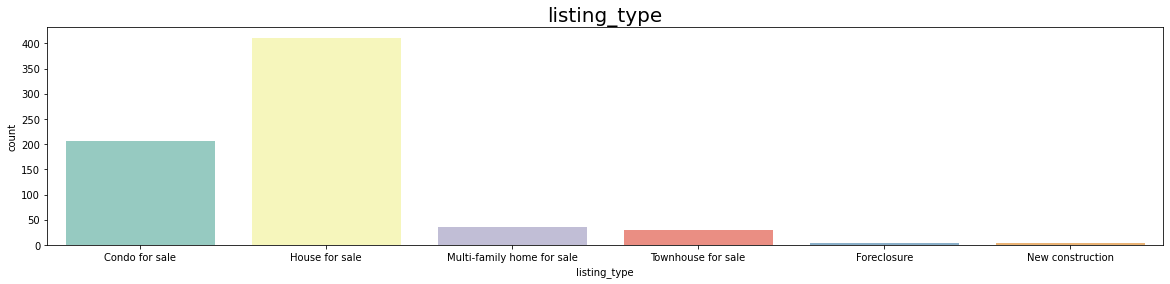

In [ ]:
final_df_clean["listing_type"].replace({"Home for sale": "House for sale"}, inplace=True)
final_df_clean["listing_type"].replace({"Coming soon": "House for sale"}, inplace=True)

fig_dims = (20, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='listing_type',ax=ax,data=final_df_clean,palette='Set3')
plt.title("listing_type",fontsize=20)

Above plot shows that House For Sale is listed more compared to other listings, then comes Condo's

1: **House for Sale**

2: **Condo's**

## **Zillow owned analysis**

Text(0.5, 1.0, 'is_zillow_owned')

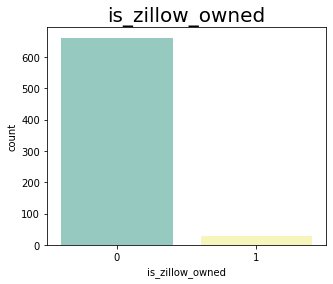

In [ ]:
fig_dims = (5, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='is_zillow_owned',ax=ax,data=final_df_clean,palette='Set3')
plt.title("is_zillow_owned",fontsize=20)

Plot Shows **Zillow does not own** most of the properties

## **Converting Listing Type Object to categorical values**

In [ ]:
def listing_type_cat(x):
    if x == 'Condo for sale':
        return 0
    elif x == 'Townhouse for sale':
        return 1
    elif x == 'House for sale':
        return 2
    else:
        return 3
    
final_df_invest_crime.insert(16, "listing_type_cat",final_df_invest_crime.apply(lambda row: listing_type_cat(row['listing_type']), axis=1))


## **Describing Listing Type**

In [ ]:
final_df_clean['listing_type'].describe()


count                688
unique                 6
top       House for sale
freq                 411
Name: listing_type, dtype: object

## **Describing Listing Type Categories**

In [ ]:
final_df_invest_crime.groupby('listing_type_cat').size()


listing_type_cat
0    166
1     15
2    256
3     84
dtype: int64

## **Analysing the Market availability for Houses**

In [ ]:
condo = len(final_df_invest_crime[final_df_invest_crime.listing_type_cat == 0])
town = len(final_df_invest_crime[final_df_invest_crime.listing_type_cat == 1])
house = len(final_df_invest_crime[final_df_invest_crime.listing_type_cat == 2])
other = len(final_df_invest_crime[final_df_invest_crime.listing_type_cat == 3])

print(f"The percentage of property with Condo, in this dataset is {round((condo/len(final_df_invest_crime.listing_type_cat)), 4)*100}% ")
print(f"The percentage of property with TownHouses, in this dataset is {round((town/len(final_df_invest_crime.listing_type_cat)), 4)*100}% ")
print(f"The percentage of property with Single Family Homes, in this dataset is {round((house/len(final_df_invest_crime.listing_type_cat)), 4)*100}% ")
print(f"The percentage of property with Others, in this dataset is {round((other/len(final_df_invest_crime.listing_type_cat)), 4)*100}% ")

The percentage of property with Condo, in this dataset is 31.86% 
The percentage of property with TownHouses, in this dataset is 2.88% 
The percentage of property with Single Family Homes, in this dataset is 49.14% 
The percentage of property with Others, in this dataset is 16.12% 


With this we can see that Single Family Homes, Multi Family Homes and Land's are more available in the market. Thus, People are more keen towards owning the land than just buying the home like Condo's and TownHouses.

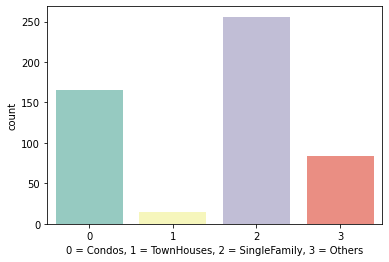

In [ ]:
sns.countplot(x='listing_type_cat', data=final_df_invest_crime, palette='Set3')
plt.xlabel("0 = Condos, 1 = TownHouses, 2 = SingleFamily, 3 = Others")
plt.show()

## **Analyzing the Market Value for Buying Houses**

In [ ]:
list_type_group = final_df_clean.groupby('listing_type')['pageViewCount'].mean().round(2)

list_type_group = list_type_group.to_frame()

list_type_group.rename(columns={'pageViewCount': 'view_avg'}, inplace=True)

list_type_group['avg_price'] = final_df_clean.groupby('listing_type')['price'].mean().round()

list_type_group['avg_hoaFee'] = final_df_clean.groupby('listing_type')['hoaFee'].mean().round()

list_type_group['avg_zestimate'] = final_df_clean.groupby('listing_type')['zestimate'].mean().round()

list_type_group['avg_rent_zestimate'] = final_df_clean.groupby('listing_type')['rent_zestimate'].mean().round()

list_type_group['avg_monthly_mortgage'] = final_df_clean.groupby('listing_type')['monthly_mortgage'].mean().round()

list_type_group['avg_number_of_rating_per_listing'] = final_df_clean.groupby('listing_type')['listed_by.rating_average'].mean().round()

list_type_group['total_number_of_rating'] = final_df_clean.groupby('listing_type')['listed_by.rating_average'].sum().round(2)

list_type_group.sort_values(by=['view_avg'])

,view_avg,avg_price,avg_hoaFee,avg_zestimate,avg_rent_zestimate,avg_monthly_mortgage,avg_number_of_rating_per_listing,total_number_of_rating
listing_type,,,,,,,,
Foreclosure,641.67,863000.0,65.0,843717.0,3690.0,3484.0,0.0,0.0
Townhouse for sale,1223.76,723875.0,349.0,782738.0,3414.0,3218.0,3.0,98.1
Multi-family home for sale,1331.17,1519719.0,1.0,1195889.0,4753.0,6016.0,2.0,88.9
House for sale,1903.88,1106461.0,69.0,1115084.0,4089.0,4451.0,3.0,1353.9
Condo for sale,1911.13,696188.0,403.0,693097.0,3080.0,3161.0,3.0,663.2
New construction,2286.67,2728333.0,0.0,2830700.0,7692.0,10796.0,3.0,9.9


When it comes to Buying, we should always keep in mind that our invested money should either be in no loss or should have a good profit.

Considering this thought in mind, the above metrics proves that it is **good to invest in Condo's and Townhouses.**

Why? Because when we calculate the average rent zestimate and monthly mortgage, the value is greater for rent zestimate, which means you will have profit **(RentZestimate - Monthly Mortgage(includes HOA, Property Taxes and upKeep)) > 0 = Good Buy**

## **Analysis of new feature added "Investment"**

Text(0.5, 1.0, 'investment')

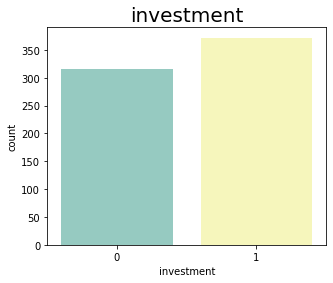

In [ ]:
fig_dims = (5, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='investment',ax=ax,data=final_df_clean,palette='Set3')
plt.title("investment",fontsize=20)

Plot shows it is **always good to invest in real estate market**, as the number of good investment is more.

## **Analysis of Investment in which of the Listing Type**

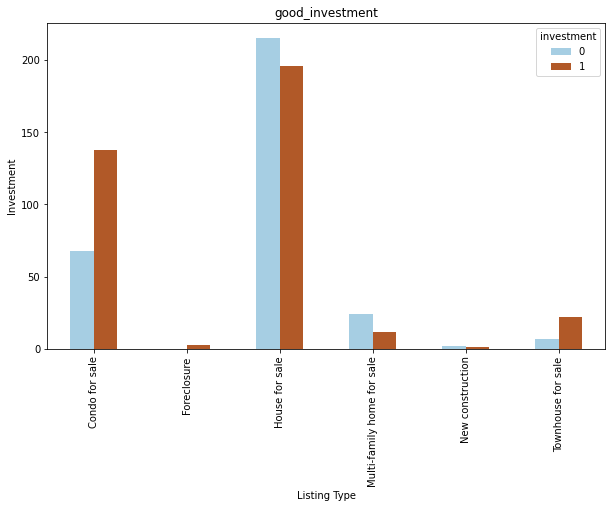

In [ ]:
pd.crosstab(final_df_clean.listing_type,final_df_clean.investment).plot(kind="bar",figsize=(10,6),colormap='Paired')
plt.title('good_investment')
plt.xlabel('Listing Type')
plt.ylabel('Investment')
plt.show()

The plot proves that it is **good to invest in Condo's TownHouses**

# **Shapely Values, Correlation Map and Gini Score for First and 2nd DataSets**

## **Shapely Values for first dataset**

In [ ]:
import shap
# load JS visualization code to notebook
shap.initjs()

[23:08:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


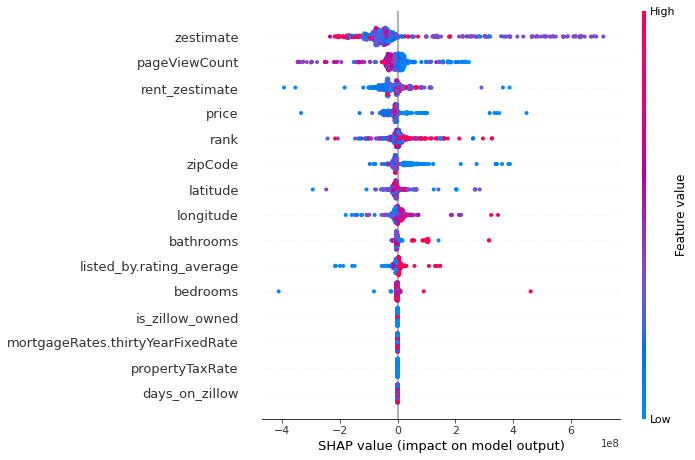

In [ ]:
X = final_df_invest_crime.drop(['Total Crime Risk','Median household income','investment','property_id','currency','address','area','image','listing_type','input','property_url','listing_url','monthly_mortgage','listing_type_cat','hoaFee','property_tax_price'], axis=1)
y = final_df_invest_crime['property_id']
from xgboost.sklearn import XGBRegressor
model = XGBRegressor(n_estimators=1000, max_depth=10, learning_rate=0.001)
# Fit the Model
model.fit(X, y)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, features=X, feature_names=X.columns)

## **Shapely Values for 2nd and 3rd dataset**

[23:08:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


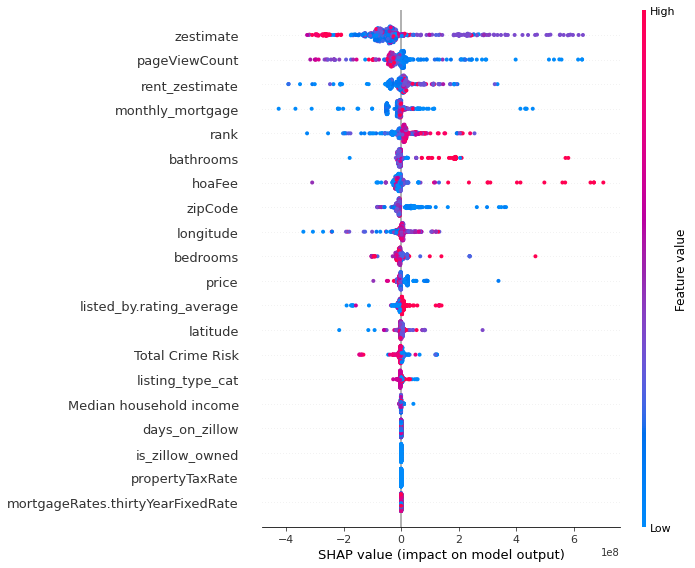

In [ ]:
X = final_df_invest_crime.drop(['property_id','currency','address','area','image','listing_type','input','property_url','listing_url'], axis=1)
y = final_df_invest_crime['property_id']
from xgboost.sklearn import XGBRegressor
model = XGBRegressor(n_estimators=1000, max_depth=10, learning_rate=0.001)
# Fit the Model
model.fit(X, y)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, features=X, feature_names=X.columns)

## **Correlation Map for First Dataset**

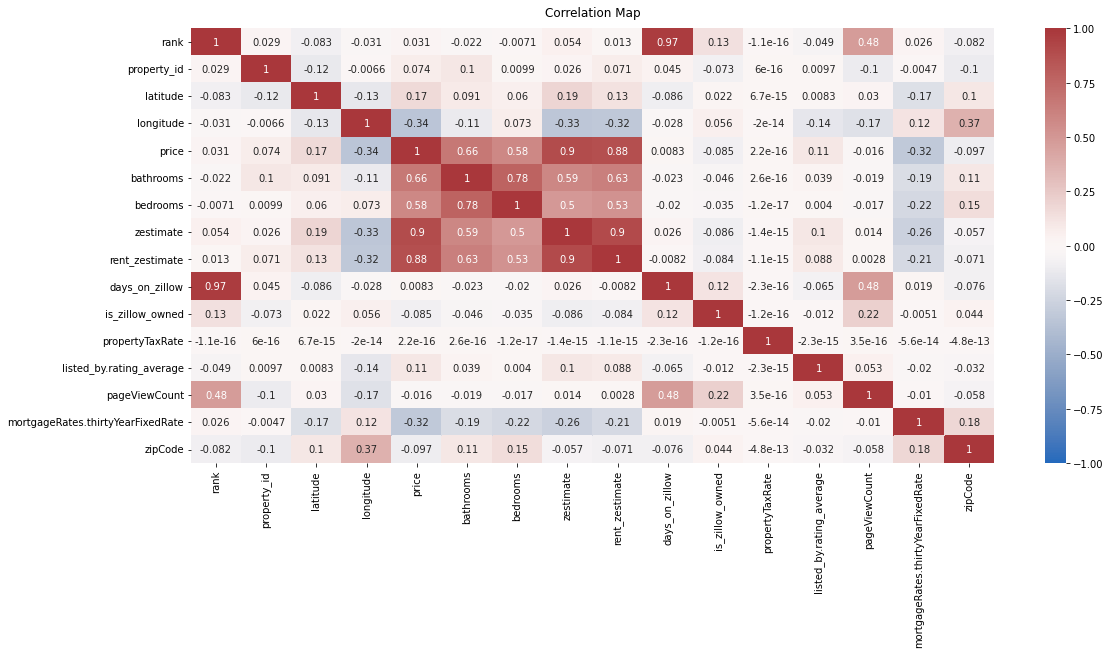

In [ ]:
# Correlation matrix to understand relation between variables
temp_df = final_df_invest_crime.drop(['Total Crime Risk','Median household income','property_tax_price','investment','monthly_mortgage','listing_type_cat','hoaFee'], axis=1)

plt.figure(figsize=(18, 8))
sns.heatmap(temp_df.corr(), vmin=-1, vmax=1, annot=True, cmap='vlag') # cmap='BrBG'
plt.title('Correlation Map', fontdict={'fontsize':12}, pad=12);

## **Correlation Map for 2nd Dataset**

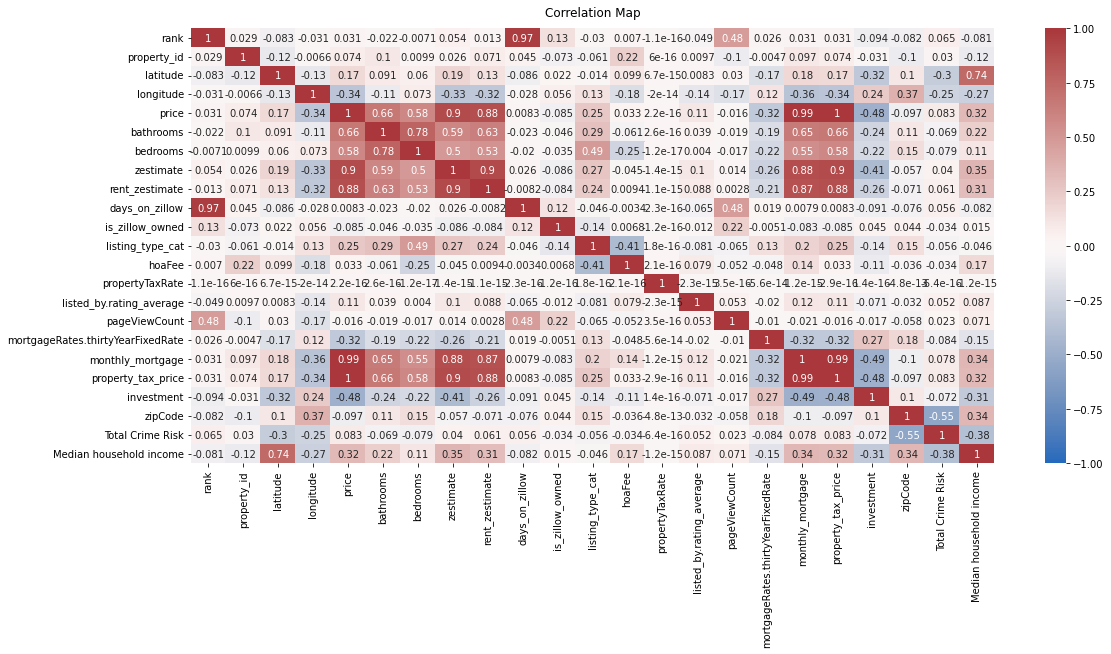

In [ ]:
# Correlation matrix to understand relation between variables

plt.figure(figsize=(18, 8))
sns.heatmap(final_df_invest_crime.corr(), vmin=-1, vmax=1, annot=True, cmap='vlag') # cmap='BrBG'
plt.title('Correlation Map', fontdict={'fontsize':12}, pad=12);

## **Gini Score for First Dataset**

In [ ]:
import numpy as np
import matplotlib

def gini_coeff(x):
    # array = array.flatten() 
    # requires all values in x to be zero or positive numbers,
    # otherwise results are undefined
    n = len(x)
    s = x.sum()
    r = np.argsort(np.argsort(-x)) # calculates zero-based ranks
    val = 1 - (2.0 * (r*x).sum() + s)/(n*s)
    return val.sort_values(ascending=False)

In [ ]:
X = final_df_invest_crime.drop(['Total Crime Risk','Median household income','investment','property_tax_price','listing_type_cat','mortgageRates.thirtyYearFixedRate','pageViewCount','listed_by.rating_average','propertyTaxRate','hoaFee','monthly_mortgage','currency','address','area','image','listing_type','input','property_url','listing_url'], axis=1)
score = gini_coeff(X)
df_giniscore = pd.DataFrame(score, columns=['score'])
df_giniscore['score'] = score
df_giniscore


,score
property_id,0.998081
zestimate,0.992903
price,0.992000
zipCode,0.986579
rent_zestimate,0.982726
rank,0.978878
latitude,0.975247
days_on_zillow,0.970977
bedrooms,0.967440
bathrooms,0.966764


## **Gini Score for newly added Features**

In [ ]:
X = final_df_invest_crime.drop(['Total Crime Risk','Median household income','listing_type_cat','mortgageRates.thirtyYearFixedRate','pageViewCount','listed_by.rating_average','propertyTaxRate','hoaFee','currency','address','area','image','listing_type','input','property_url','listing_url'], axis=1)
# a1 = X.values
score = gini_coeff(X)
df_giniscore = pd.DataFrame(score, columns=['score'])
df_giniscore['score'] = score
df_giniscore

,score
property_id,0.998081
zestimate,0.992903
price,0.992000
zipCode,0.986579
monthly_mortgage,0.981357
rent_zestimate,0.980675
property_tax_price,0.974343
rank,0.973166
latitude,0.967569
days_on_zillow,0.963337


## **Gini Score for 2nd Dataset**

In [ ]:
X = final_df_invest_crime.drop(['Total Crime Risk','Median household income','property_tax_price','investment','monthly_mortgage','currency','address','area','image','listing_type','input','property_url','listing_url'], axis=1)
# a1 = X.values
score = gini_coeff(X)
df_giniscore = pd.DataFrame(score, columns=['score'])
df_giniscore['score'] = score
df_giniscore

,score
property_id,0.998081
zestimate,0.993013
price,0.991892
zipCode,0.986579
rent_zestimate,0.982318
pageViewCount,0.980197
hoaFee,0.975252
rank,0.974757
latitude,0.969682
days_on_zillow,0.965346


## **Gini Score for 3rd Dataset with newly added features**

In [ ]:
X = final_df_invest_crime.drop(['currency','address','area','image','listing_type','input','property_url','listing_url'], axis=1)
# a1 = X.values
score = gini_coeff(X)
df_giniscore = pd.DataFrame(score, columns=['score'])
df_giniscore['score'] = score
df_giniscore

,score
property_id,0.998081
zestimate,0.992903
price,0.992000
zipCode,0.986159
Median household income,0.983450
monthly_mortgage,0.977182
rent_zestimate,0.976428
pageViewCount,0.973673
property_tax_price,0.967484
hoaFee,0.965973


# **Dimensionality Reduction : PCA using newly added Features, Accuracy increases to 0.902**

In [ ]:
# evaluate pca with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=688, n_features=18, n_informative=14, n_redundant=4, random_state=7)
# define the pipeline
steps = [('pca', PCA(n_components=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.902 (0.045)


# **Fractal Clustering, finding Golden Cluster**

Our main objective is to shortlist the listings which would give maximum returns to the investor. For this we are performing clustering at multiple levels to find our golden cluster.

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from matplotlib import pyplot as plt
from past.builtins import xrange
from itertools import cycle, islice
from datetime import datetime
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import StandardScaler
from pandas.plotting import parallel_coordinates


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
def sse_and_silhouette_score(best_cols,best_vals):  
  # best_cols=[col1.name,col2.name]
  # best_vals = df[best_cols].iloc[ :, [0,1]].values
  sse_within_cluster = {}
  silhouette_score = {}
  max_loop=25
  for k in range(2, max_loop):
    kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10, n_jobs=-1)
    kmeans.fit(best_vals)
    sse_within_cluster[k] = kmeans.inertia_
    silhouette_score[k] = metrics.silhouette_score(best_vals, kmeans.labels_, random_state=10)

  _ = plt.figure(figsize=(10,6))
  ax1 = plt.subplot(211)
  _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
  _ = plt.xlabel("Number of Clusters")
  _ = plt.ylabel("SSE Within Cluster")
  _ = plt.title("Within Cluster SSE After K-Means Clustering")
  _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)

  ax2 = plt.subplot(212)
  _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
  _ = plt.xlabel("Number of Clusters")
  _ = plt.ylabel("Silhouette Score")
  _ = plt.title("Silhouette Score After K-Means Clustering")
  _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)

  plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

In [ ]:

def apply_cluster(col1,col2, df_f,clusters):
  try:
    df_f.drop('cluster', axis=1, inplace=True)
  except:
    next
  best_cols=[col1.name,col2.name]
  best_vals = df_f[best_cols].iloc[ :, [0,1]].values
  kmeans = KMeans(n_clusters=clusters, random_state=10, n_init=10, n_jobs=-1)  
  kmeans.fit(best_vals) 
  score = metrics.silhouette_score(best_vals, kmeans.labels_, random_state=10)
  df_f['cluster'] = kmeans.labels_
  sse_within_cluster = kmeans.inertia_
  kmeans.cluster_centers_
  
  print("clustering performance")
  print("-----------------------------------")
  print("silhouette score: " + str(score.round(2)))
  print("sse with in cluster: " + str(sse_within_cluster.round()))
  print("Number of points in clusters:\n", df_f['cluster'].value_counts())


  sns.lmplot(data=df_f, x=col1.name, y=col2.name, hue='cluster', fit_reg=False, legend=True, legend_out=True).set(title="K-Means Cluster Plot")
  plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black',marker='*',label='centroid')
  
  return df_f

## **SSE and Silhouette score Method for calculating Clusters**

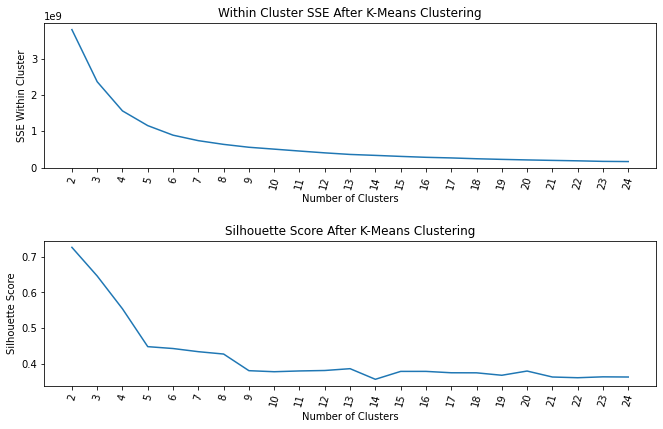

In [ ]:
col1=final_df_clean['monthly_mortgage']
col2=final_df_clean['rent_zestimate']
best_cols=[col1.name,col2.name]
best_vals = final_df_clean[best_cols].iloc[ :, [0,1]].values
sse_and_silhouette_score(best_cols,best_vals)

## **First Iteration of Monthly Mortgage and Rent Zestimate**

clustering performance
-----------------------------------
silhouette score: 0.45
sse with in cluster: 1156048392.0
Number of points in clusters:
 0    285
2    282
1     91
4     28
3      2
Name: cluster, dtype: int64


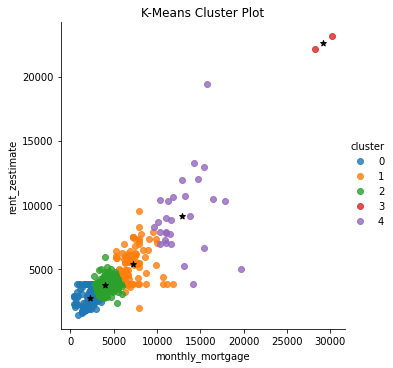

In [ ]:
col1=final_df_clean['monthly_mortgage']
col2=final_df_clean['rent_zestimate']
first_trial = apply_cluster(col1,col2,final_df_clean,5)

In [ ]:
# creating a dataframe that only consists of cluster `0`
cluster_good_investment = first_trial.query("cluster == 2").reset_index(drop=True)

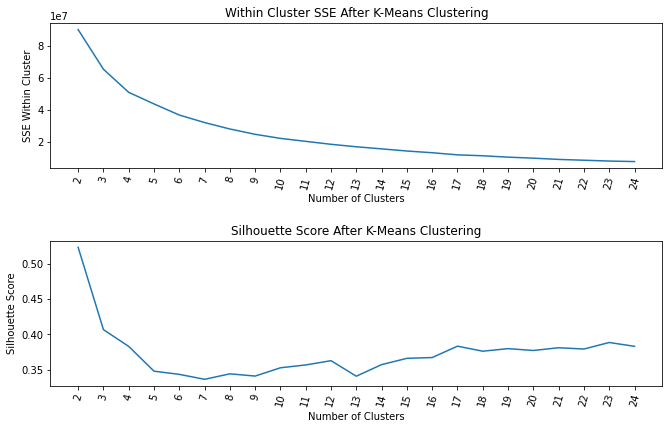

In [ ]:
col1=cluster_good_investment['monthly_mortgage']
col2=cluster_good_investment['rent_zestimate']
best_cols=[col1.name,col2.name]
best_vals = cluster_good_investment[best_cols].iloc[ :, [0,1]].values
sse_and_silhouette_score(best_cols,best_vals)

## **2nd Iteration of Monthly Mortgage and Rent Zestimate** 

clustering performance
-----------------------------------
silhouette score: 0.35
sse with in cluster: 43690526.0
Number of points in clusters:
 0    93
2    77
1    40
4    39
3    33
Name: cluster, dtype: int64


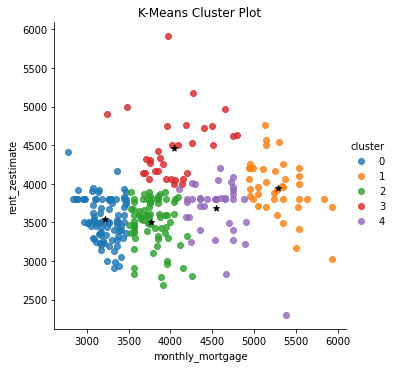

In [ ]:
col1=cluster_good_investment['monthly_mortgage']
col2=cluster_good_investment['rent_zestimate']
second_trial = apply_cluster(col1,col2,cluster_good_investment,5)

In [ ]:
# creating a dataframe that only consists of cluster `0`
cluster_best_investment = second_trial.query("cluster == 0").reset_index(drop=True)

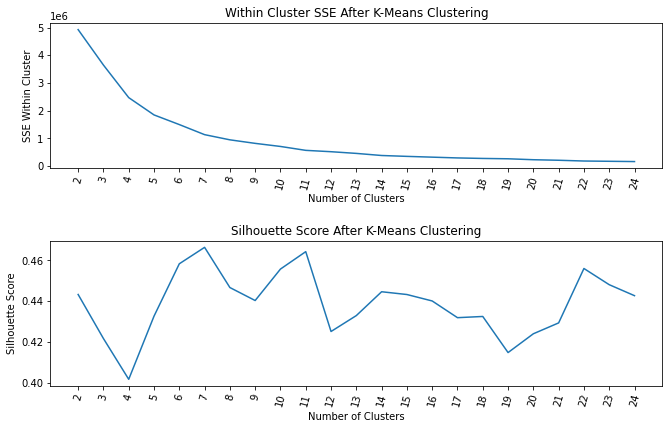

In [ ]:
col1=cluster_best_investment['monthly_mortgage']
col2=cluster_best_investment['rent_zestimate']
best_cols=[col1.name,col2.name]
best_vals = cluster_best_investment[best_cols].iloc[ :, [0,1]].values
sse_and_silhouette_score(best_cols,best_vals)

## **3rd Iteration of Monthly Mortgage and Rent Zestimate** 

clustering performance
-----------------------------------
silhouette score: 0.46
sse with in cluster: 1500913.0
Number of points in clusters:
 0    19
4    18
1    18
3    16
2    15
5     7
Name: cluster, dtype: int64


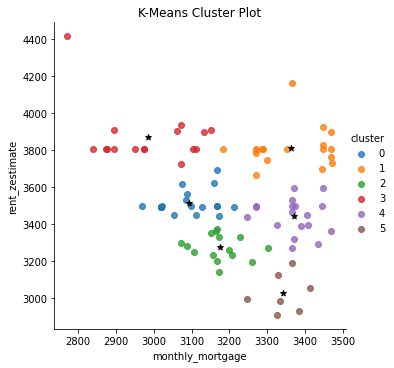

In [ ]:
col1=cluster_best_investment['monthly_mortgage']
col2=cluster_best_investment['rent_zestimate']
third_trial = apply_cluster(col1,col2,cluster_best_investment,6)

**Golden Cluster = 3**, where rent_zestimate > monthly_mortgage, as we know rent_zestimate - monthly_mortgage(HOA, Property Taxes, upKeep) > 0 then its a good buy.

In [ ]:
final_df_clean = final_df_clean.drop(['cluster'],axis=1)

# **Implementing ML models for Classifiers and Regressors**

In [ ]:
#Training with imbalance data
import time
import pickle
from sklearn import metrics
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def classfier_method(X_train, X_test, y_train, y_test,file_name):
  names = ["KNN Classifier", "Logistic Regressor", "Gradient Boost Classifier", "Random Forest Classifier" ,
          "MLP Classifier","Decision Tree"
          ]
  classifiers = [
      KNeighborsClassifier(n_neighbors=2),
      LogisticRegression(),
      ensemble.GradientBoostingClassifier(n_estimators=500,
            max_depth= 5,
            min_samples_split= 5,
            learning_rate=0.01),
      RandomForestClassifier(max_depth=5, random_state=0),
      MLPClassifier(random_state=1, max_iter=1000),
      DecisionTreeClassifier(max_depth=5),]
  
  for name, clf in zip(names, classifiers):
      start_time = time.time()
      clf.fit(X_train, y_train)
      pickle.dump(clf, open(file_name + '.pkl', 'wb'))
      pickled_model = pickle.load(open(file_name + '.pkl', 'rb'))
      y_pred=pickled_model.predict(X_test)

      print('Classifier: ',name)
      print(classification_report(y_test, clf.predict(X_test)))
      
      print(100*'=')
      
  return y_test, y_pred

In [ ]:
import time
import pickle
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

def regressor_method(X_train, X_test, y_train, y_test,file_name):
  names = ["KNN Regressor", "Gradient Boost Regressor", "Random Forest Regressor" ,
          "MLP Regressor", "Linear Regressor"
          ]
  names1 = ["KNN Regressor", "Gradient Boost Regressor", "Random Forest Regressor" ,
           "Linear Regressor"
          ]
  regressors = [
      KNeighborsRegressor(n_neighbors=2),
      ensemble.GradientBoostingRegressor(n_estimators=500,
            max_depth= 4,
            min_samples_split= 5,
            learning_rate=0.01,
            loss='ls'),
      RandomForestRegressor(max_depth=2, random_state=0),
      MLPRegressor(random_state=1, max_iter=500),
      LinearRegression()]
  max_score = 0.0
  max_class = ''
  accuracy_score=[]

  # iterate over regressors
  for name, clf in zip(names, regressors):
      start_time = time.time()
      clf.fit(X_train, y_train)
      pickle.dump(clf, open(file_name + '.pkl', 'wb'))
      pickled_model = pickle.load(open(file_name + '.pkl', 'rb'))
      # y_pred=pickled_model.predict(X_test)
      # cm1 = confusion_matrix(y_test,y_pred)
      score = pickled_model.score(X_test,y_test)
      if name != 'MLP Regressor':
        accuracy_score.append(score.copy())

      print('Regressor: ',name)
      print('Mean Absolute Error:', score)  

      print(100*'=')
      
      if score > max_score:
          clf_best = clf
          max_score = score
          max_class = name


  print(100*'-' )
  print('Best --> Regressor = %s, Accuracy Score = %.2f' %(max_class, max_score))
  sns.set(rc={'figure.figsize':(9,5)})
  plt.title("Accuracy Score vs Algorithms")
  plt.xlabel("Algorithms")
  plt.ylabel("Accuracy Score")
  # plt.figure(figsize=(10,6))
  sns.barplot(x = names1, y = accuracy_score)


In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
def cf_matrix_plot(y_test,y_pred):
  conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
  print('Confusion matrix:\n', conf_mat)

  labels = ['Class 0', 'Class 1']
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
  fig.colorbar(cax)
  ax.set_xticklabels([''] + labels)
  ax.set_yticklabels([''] + labels)
  plt.xlabel('Predicted')
  plt.ylabel('Expected')
  plt.show()

## **Training and splitting the first dataset**

In [ ]:
X_base = final_df_invest_crime.drop(['Median household income','Total Crime Risk','investment','property_tax_price','mortgageRates.thirtyYearFixedRate','pageViewCount','listed_by.rating_average','propertyTaxRate','hoaFee','monthly_mortgage','currency','address','area','image','listing_type','input','property_url','listing_url'], axis=1)

y_base = final_df_invest_crime['investment']

In [ ]:
from sklearn.model_selection import train_test_split
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_base, y_base, test_size = 0.25, random_state = 0)

### **Classifier for first dataset**

In [ ]:
y_test_base, y_pred_base = classfier_method(X_train_base, X_test_base, y_train_base, y_test_base,"clf_pkl_base")

Classifier:  KNN Classifier
              precision    recall  f1-score   support

           0       0.58      0.88      0.70        52
           1       0.88      0.58      0.70        79

    accuracy                           0.70       131
   macro avg       0.73      0.73      0.70       131
weighted avg       0.76      0.70      0.70       131

Classifier:  Logistic Regressor
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        52
           1       0.82      0.82      0.82        79

    accuracy                           0.79       131
   macro avg       0.78      0.78      0.78       131
weighted avg       0.79      0.79      0.79       131

Classifier:  Gradient Boost Classifier
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        52
           1       0.87      0.86      0.87        79

    accuracy                           0.84       131
   macro avg       0.83      

### **Confusion Metrics for first dataset**

Confusion matrix:
 [[37 15]
 [13 66]]


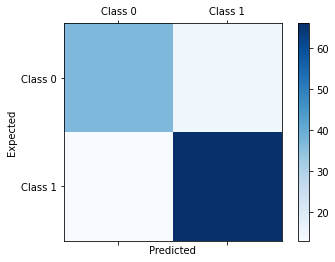

In [ ]:
cf_matrix_plot(y_test_base,y_pred_base)

### **Regressor for first dataset**

Regressor:  KNN Regressor
Mean Absolute Error: 0.09116358325219098
Regressor:  Gradient Boost Regressor
Mean Absolute Error: 0.5627154883581662
Regressor:  Random Forest Regressor
Mean Absolute Error: 0.3546640416722404
Regressor:  MLP Regressor
Mean Absolute Error: -482786699.5416125
Regressor:  Linear Regressor
Mean Absolute Error: 0.32631677032487705
----------------------------------------------------------------------------------------------------
Best --> Regressor = Gradient Boost Regressor, Accuracy Score = 0.56


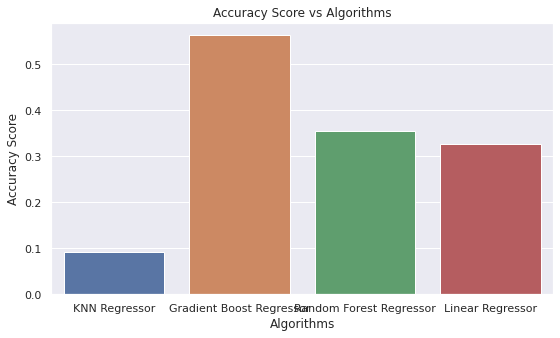

In [ ]:
regressor_method(X_train_base, X_test_base, y_train_base, y_test_base,"reg_pkl_base")

Excluded MLP Regressor as it in -ve value

## **Train and Split for 2nd and 3rd Dataset**

In [ ]:
X_new = final_df_invest_crime.drop(['Median household income','Total Crime Risk','currency','address','area','image','listing_type','input','property_url','listing_url','investment'], axis=1)

y_new = final_df_invest_crime['investment']

In [ ]:

from sklearn.model_selection import train_test_split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size = 0.25, random_state = 0)

### **Classifier for 2nd and 3rd Dataset**

In [ ]:
y_test_new, y_pred_new = classfier_method(X_train_new, X_test_new, y_train_new, y_test_new,"clf_pkl_new")

Classifier:  KNN Classifier
              precision    recall  f1-score   support

           0       0.58      0.88      0.70        52
           1       0.88      0.58      0.70        79

    accuracy                           0.70       131
   macro avg       0.73      0.73      0.70       131
weighted avg       0.76      0.70      0.70       131

Classifier:  Logistic Regressor
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        52
           1       0.82      0.82      0.82        79

    accuracy                           0.79       131
   macro avg       0.78      0.78      0.78       131
weighted avg       0.79      0.79      0.79       131

Classifier:  Gradient Boost Classifier
              precision    recall  f1-score   support

           0       0.90      0.85      0.87        52
           1       0.90      0.94      0.92        79

    accuracy                           0.90       131
   macro avg       0.90      

### **Confusion Metrics for 2nd and 3rd Dataset**

Confusion matrix:
 [[39 13]
 [11 68]]


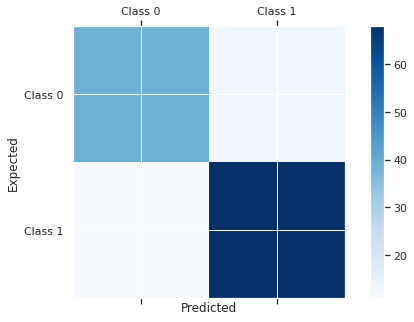

In [ ]:
cf_matrix_plot(y_test_new,y_pred_new)

### **Regressor for 2nd and 3rd Dataset**

Regressor:  KNN Regressor
Mean Absolute Error: 0.09116358325219098
Regressor:  Gradient Boost Regressor
Mean Absolute Error: 0.67367457421951
Regressor:  Random Forest Regressor
Mean Absolute Error: 0.4000678655787151
Regressor:  MLP Regressor
Mean Absolute Error: -773665663.9689975
Regressor:  Linear Regressor
Mean Absolute Error: 0.3577438738216119
----------------------------------------------------------------------------------------------------
Best --> Regressor = Gradient Boost Regressor, Accuracy Score = 0.67


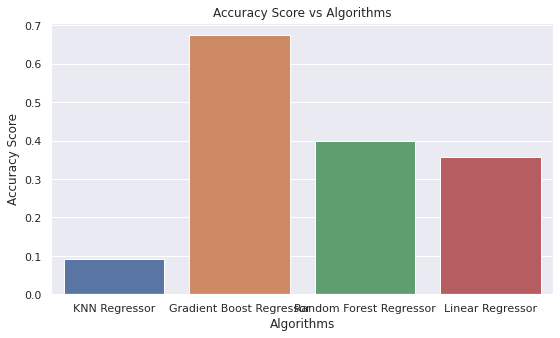

In [ ]:
regressor_method(X_train_new, X_test_new, y_train_new, y_test_new,"reg_pkl_new")

# **Adding Latent Variable**

## **Latent Variable as "best_choice" based on crime data, average house income, zestimate and rent_zestimate.**

In [ ]:
def best_choice_cat(x,y):
    if x >90 & y <70000 :
        return 0
    else:
        return 1
    
final_df_invest_crime.insert(31, "best_choice", final_df_invest_crime.apply(lambda row: best_choice_cat(row['Total Crime Risk'],row['Median household income']), axis=1))


In [ ]:
def affordable(x):
    if x < 70000 :
        return 0
    else:
        return 1
    
final_df_invest_crime.insert(32, "affordable", final_df_invest_crime.apply(lambda row: affordable(row['Median household income']), axis=1))


if a house has crime rate more than its mean that is "90", then its not a best choice, similarly is the house income is less than "70000", its mean, then this is also not the best choice.

Excluding all this we are find a best choice for the customer.

## **Train and split after adding Latent Variable**

In [ ]:
X_final = final_df_invest_crime.drop(['investment','currency','address','area','image','listing_type','input','property_url','listing_url'], axis=1)

y_final = final_df_invest_crime['investment']

In [ ]:
from sklearn.model_selection import train_test_split
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_final, y_final, test_size = 0.25, random_state = 0)

### **Classifier after adding Latent Variable**

In [ ]:
y_test_final, y_pred_final = classfier_method(X_train_final, X_test_final, y_train_final, y_test_final,"clf_pkl_final")

Classifier:  KNN Classifier
              precision    recall  f1-score   support

           0       0.59      0.90      0.71        52
           1       0.90      0.58      0.71        79

    accuracy                           0.71       131
   macro avg       0.74      0.74      0.71       131
weighted avg       0.78      0.71      0.71       131

Classifier:  Logistic Regressor
              precision    recall  f1-score   support

           0       0.75      0.73      0.74        52
           1       0.82      0.84      0.83        79

    accuracy                           0.79       131
   macro avg       0.79      0.78      0.78       131
weighted avg       0.79      0.79      0.79       131

Classifier:  Gradient Boost Classifier
              precision    recall  f1-score   support

           0       0.90      0.85      0.87        52
           1       0.90      0.94      0.92        79

    accuracy                           0.90       131
   macro avg       0.90      

### **Confusion Metrics after adding Latent Variable**

Confusion matrix:
 [[38 14]
 [11 68]]


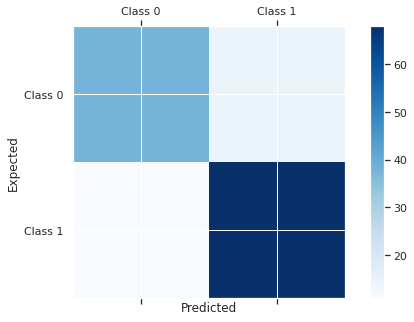

In [ ]:
cf_matrix_plot(y_test_final,y_pred_final)

### **Regressor after adding Latent Variable**

Regressor:  KNN Regressor
Mean Absolute Error: 0.15494157740993197
Regressor:  Gradient Boost Regressor
Mean Absolute Error: 0.6810408126898516
Regressor:  Random Forest Regressor
Mean Absolute Error: 0.39888773643459075
Regressor:  MLP Regressor
Mean Absolute Error: -308012757916210.8
Regressor:  Linear Regressor
Mean Absolute Error: 0.36253656194448813
----------------------------------------------------------------------------------------------------
Best --> Regressor = Gradient Boost Regressor, Accuracy Score = 0.68


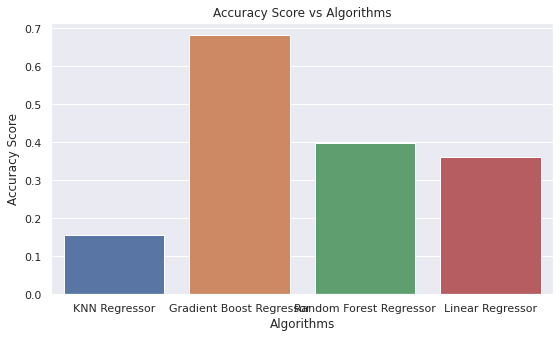

In [ ]:
regressor_method(X_train_final, X_test_final, y_train_final, y_test_final,"reg_pkl_final")

From the above reports and metrics, it is clear that the **accuracy has been increased** from first dataset to 2nd and 3rd dataset to adding latent variables, i.e. from 

**Regressor: 0.56 -> 0.67 -> 0.69**

**Classifier: 0.80 -> 0.89 -> 0.92**